# <p style="text-align: center;">Exploring Robustness in Dynamic Graphs</p>

<p style="text-align: center;">
<i>
Michael Uftring<br>
Indiana University<br>
INFO-I606-32299 - Network Science<br>
Spring, 2018
</i>
</p>

<p style="padding-left:60px; padding-right:60px">
<b>Abstract.</b> A <i>dynamic graph</i> is a graph "in motion;" it changes over time. A static graph is one which never changes. A dynamic graph may be additive in nature, where vertices or edges are added to the graph. Or, a dynamic graph may be subtractive in nature, where elements are removed. These natures are not mutually exclusive, as a dynamic graph may demonstrate both additive and subtractive behaviors. The <i>robustness</i> of a graph is a measure of how well the graph maintains its structure, form, and integrity when undergoing drastic (perhaps unexpected) change. Common measures of robustness are related to connectivity, path length, and clustering. This project aims to examine robustness in dynamic graphs by constructing models of behavior (both normal and unexpected), and executing them on dynamic graphs. The measure of robustness in these experiments will be effectiveness of a spreading process. The work will be performed in a Jupyter Notebook environment with Gephi for graph visualization.

# 1. Introduction

The objective of this project is to determine if the effectiveness of a *spreading process* can be used as a measure of *robustness* in *dynamic graphs*. The general idea is to model a dynamic graph with some additive behavior and  different detractive behaviors. The detractive processes will be modelled as random failures and targeted attacks. While these structural changes are taking place on the network, a spreading process will be working to "infect" the entire network. The spreading processes is considered effective, or successful, if and when the entire network becomes infected. The measure indicating success will be expressed as either a rate over time or as an amount of time to fully spread (i.e., reach saturation). This experimental apporach will be applied to exponential (Erdos-Renyi model) networks, and scale-free (Barabasi-Albert model) networks, and the resuls will be compared.

## 1.1 Dynamic Graphs

A *graph* $G$ is a pair $(V, E)$, where $V$ is a finite set of vertices (or nodes), and $E$ is a set of edges (or links). In an *undirected graph*, each edge is an unordered pair $\left \{ u, v \right \}$ of distinct nodes. In a *directed graph*, each edge is an ordered pair $\left \{ u, v \right \}$ of distinct nodes; this is an indication of a direction which reflects the origin and destination for the relationship represented by the edge. For *weighted graphs*, the notion of functions mapping values to numbers (the weight of a graph component) is added to the graph definition; $f()$: map vertices to numbers, and $g()$: map edges to numbers. The full model can be expressed as: 

$$G = (V, E, f, g)$$

A *dynamic graph* is obtained when any of the graph components changes over time [1]. Graphs are subject to discrete changes, such as insertions or deletions of vertices or edges, or changes in weights. By dynamic graph we denote a graph that is subject to a sequence of updates [2].

Dynamic graphs are often typed or classified by the characteristics of their dynamic behavior. Depending on perspective, one of the following categorizations may be employed to assist in characterizing a dynamic graph. 

A component-based typing may be used where the dynamic graph is designated as [1]:

- **node-dynamic**: the set of V varies over time; some nodes may be added or removed. 
- **edge-dynamic**: the set of E varies over time; edges may be added or removed.
- **weight-dynamic**: the weights on vertices or edges changes
- **fully-dynamic**: all aspects of the graph may change

Or, the emphasis may be placed on generally trying to qualify the type of change [3]:

- **incremental**: vertices or edges are only added
- **decremental**: vertices or edges are only removed
- **partially dynamic**: only certain components can be added or removed
- **fully dynamic**: any component can be added, removed, or changed

> *A common point in all these types and classification is that the system structure - the network topology - varies in time. Furthermore the rate and/or degree of the changes is generally too high to be reasonably modeled in terms of network faults or failures: in these systems changes are not anomalies but rather integral part of the nature of the system.*
> 
> A.Casteigts, *Time-Varying Graphs and Dynamic Networks*

<img style="width:560px;height:370px;" alt="Embedded Image" src="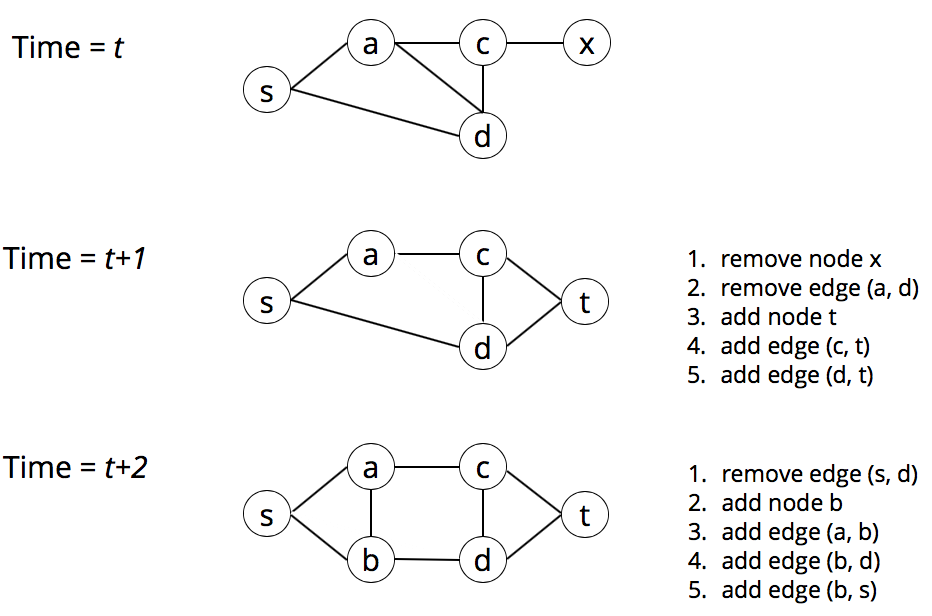
">

**Figure 1 - Example Dynamic Network**. A dynamic graph will change across a span of time. At each measured point in time (i.e., a snapshot) the amount of change effected, or the catalog of changes, on the graph can be accounted.

### 1.1.1 Models
Some formal models for dynamic graphs have emerged as the field has been studied. What follows is a brief overview of two that were interesting. One is presented in a formal model fashion, and the second is presented in a more descriptive manner. These presentations are for informational and study purposes only. While they were instructive and influential, they are not an integral part of the experiment.

#### 1.1.1.1 TVG

Casteigts et al [4] set out with the goal of building a unified model and framework for dynamic networks. The research team explored many papers and journals to gather as much information as they could on the various published models. Ultimately they came to formally define a time-varying graph (TVG) and describe it by:

$$\mathcal{G}=(V, E, \mathcal{T}, \rho, \zeta, \psi, \varphi)$$

where

<table>
    <col width="160">
    <col width="480">
    <tr><td><p align="center">$V$</p></td><td><p align="left">is the set of vertices</p></td></tr>
    <tr><td><p align="center">$E$</p></td><td><p align="left">is the set of edges</p></td></tr>
    <tr><td><p align="center">$\mathcal{T}$</p></td><td><p align="left">is a time span representing the lifetime of the system, where $\mathcal{T} \subseteq \mathbb{T}$</p></td></tr>
    <tr><td><p align="center">$\rho : E \times \mathcal{T} \rightarrow \left \{ 0, 1 \right \}$</p></td><td><p align="left">is a *presence function* that indicates whether an edge is available at a given time</p></td></tr>
    <tr><td><p align="center">$\zeta : E \times \mathcal{T} \rightarrow \mathbb{T}$</p></td><td><p align="left">is a *latency function* that indicates the latency (i.e., weight or cost) of an edge at a given time</p></td></tr>
    <tr><td><p align="center">$\psi : V \times \mathcal{T} \rightarrow \left \{ 0, 1 \right \}$</p></td><td><p align="left">is a node presence function</p></td></tr>
    <tr><td><p align="center">$\varphi : V \times \mathcal{T} \rightarrow \mathbb{T}$</p></td><td><p align="left">is a node latency function</p></td></tr>
</table>


#### 1.1.1.2 Barabasi-Albert (extended)

Acknowledging that the original form of the Barabasi-Albert model has some shortcomings, several extensions were developed in order to captures a wide range of phenomena that shape the topology of real networks [7]. The extensions are briefly described here; the mathematics and complete description and definition can be found in the reference material. 

- **Initial Attractiveness**: Developed to overcome the fact that nodes with degree = 0 will never gain any edges under *preferential attachment*. This extension adds a constant feature to the probability such that every node has at least a minimal likelihood of some attachment. Given this, nodes with degree = 0 will have some chance of gaining a connection to the broader network.
- **Internal Links**: Each cycle of the normal additive process in the BA model will add new nodes to the network and then add links to from those new nodes to existing nodes. In real world scenarios new links are added between existing nodes (not just involving new nodes). So the model was extended such that after the $m$ new nodes are added, $n$ new links are added between existing nodes.
- **Node Deletion**: This capability acknowledges the fact that nodes are removed in real networks.
- **Accelerated Growth**: Instead of growing the number of links linearly with the number of nodes, this extension provides the capability to grow the number of links faster than the normal (model defined) rate.
- **Aging**: Nodes, or edges, may naturally age over time and lose "strength" or effectiveness or drive or interest (for example, in the context of social or citation networks). This acts as a growth rate and expresses that a node's adding of edges may either slow or decline, or even become detractive (edges are removed) over time.

### 1.1.2 Representation
Various approaches have been developed for representing dynamic graphs. Given that a dynamic graph is not static, maintaining a simple edge list will not be sufficient. The temporal aspect of dynamic graphs must be addressed and accounted for, and this is generally achieved in one of two fashions. 

#### 1.1.2.1 Time-ordered snapshots

The *time-ordered snapshots* approach is to take a snapshot of the dynamic graph at either uniform periods of time, or after each change (or after some accumulated amount of change). The snapshot is simply a static representation of the dynamic graph at some point in time. These snapshots are bound into a collection called a sequence which are ordered by time. The format of the snapshot can be any valid form of representation: e.g., edge list, adjacency matrix. 

A significant advantage of a sequence of time-ordered snapshots is that the state of the graph can be easily retrieved for any point in time. The main disadvantage of this approach is the amount of storage space required, especially when the graph is large and the number of snapshots increases.

#### 1.1.2.2 Stream of time-ordered events

We first consider that every graph is essentially constructed by a set of ordered steps. At inception the first node in a graph appears, then a second node, and perhaps a link is established between those two initial nodes. The graph then continues to grow in each dimension -- adding nodes, and adding edges -- until construction is "complete." Up to this point, only an `add` operation has been employed. Beyond the initial contruction phase, the `update` and `delete` operation may be employed based on the behavior in the dynamic graph. Modelling adds, updates, and deletes as events is a common operation in software systems, and fits very naturally with dynamic graphs. 

A major advantage of this approach is we are only required to store each event (add, update, delete) in time order, as they occur. For this we could employ a log or journaling mechanim, which has built-in ordering semantics. This approach could dramatically reduce the amount of storage space needed, even for large graphs with a lot of dynamic behavior. 

This approach does come with some disadvantages. If we have no active representation of the graph (in computer memory), then in order to obtain the state of the graph at a given point in time, all events must be played from the beginning of time up to the desired point in time. For a large network with a lot of dynamic activity, this means processing a very large number of events which could take a long time. However, once a graph image (snapshot) is loaded in memory, if events can be played from that given point in time either forward or backward, then navigating from one point in time to another could be rather quick. This "play and rewind" approach could also permit very interesting active visualization of the graph, and provide live observations of the changes occuring.

#### 1.1.2.3 Combined Approach

We could combine the stream of time-ordered events with time-ordered snapshots. The goal would be to achieve the benefits of both, and limit the disadvatages as much as possible. As with most algorithms and storage systems, there may be a need to choose between time and space tradeoffs. A perfect dynamic graph system would permit the user to choose the storage and representation approach based on their needs and computer system capacities.

## 1.2 Robustness

> *Many natural and social systems have a remarkable ability to sustain their basic functions even when some of their components fail.*
>
> Barabasi, *Network Science*

Robustness is an indicator of a network's ability to tolerate change. How is robustness or tolerance measured? The simplest approach is to compare a network's ability to function across different scenarios. The first scenario in which the perfect environemnt exists (i.e., no change, or no unexpected behavior) is designated the *baseline*. Comparison of other scenarios, with varying conditions and environments, to that baseline should indicate relatively how well or how poorly the network performed. With some form of threshold on the measurement, the indicator of tolerance for a network can then be distilled down and labeled as either *tolerant* or *vulnerable* under certain conditions.

Given that change is inherant in a dynamic network, then the concept of robustness should obviously apply as a first principle. But how can we effectively measure robustness in an ever-changing environment? The answer is to carefully apply the same baselining and scenario-based approach:

- Pick a measure
- Establish a baseline
- Run controlled experiments
- Analyze and compare
- Draw a conclusion
- Seek peer review
- Repeat

## 1.3 Hypothesis

*Error and attack tolerance of complex networks* [9] reports what we might consider the generally expected behavior for exponential (Erdos-Renyi model) and scale-free (Barabasi-Albert model) networks when experiencing random failures and when under targeted attack (Table 1). What about when the network is a dynamic network?

<table>
    <tr><th>Network Type</th><th>Failure</th><th>Attack</th></tr>
    <tr><td>Exponential</td><td>tolerant</td><td>tolerant</td></tr>
    <tr><td>Scale-Free</td><td>tolerant</td><td>vulnerable</td></tr>
</table>

**Table 1 - Expected Tolerance.** The exponential and scale-free networks exhibit tolerance to random failures, but differ in their tolerances to targeted attacks.

**Hypothesis 1**

Given that exponential networks are tolerant to random failures and attacks, we suggest that a dynamic network formed from an Erdos-Renyi model and following a growth pattern consistent with that model (in terms of average node degree) will also be tolerant to random failures and attacks.

**Hypothesis 2**

Given that scale-free networks are tolerant to random failures but vulnerable to attacks, we suggest that a dynamic network formed from a Barabasi-Albert model and following a growth pattern consistent with that model (in terms of average node degree) will demonstrate the same tolerances.

In order to test these hypotheses, we use a spreading process to measure the network performance. The effectiveness of the spreading process will be measured in two ways. First, by the rate of spread (number of reached nodes over a period of time). Second, by the total elapsed time (simulated time cycles) to reach saturation.

# 2. Methods

The simulations for these experiments are written in Python and are run in the Jupyter Notebook environment. This affords us with the ability to rapidly try things and make changes. It also provides a means to give immediate visual feedback through plotting with Matplotlib.

NetworkX is used for creating, storing and manipulating the dynamic networks. Other libraries and packages were evaluated, but given the desired approach NetworkX was the best choice. 

The networks are visualized in Gephi in real time as they are constructed and as the dynamic and spreading processes are run. This is achieved using the Gephi Graph Streaming plug-in [13] and refactoring an implementation which utilized the Gephi Graph Streaming API [14].

<img style="float: left; width: 23%; margin-right: 1%; margin-bottom: 0.5em;" src="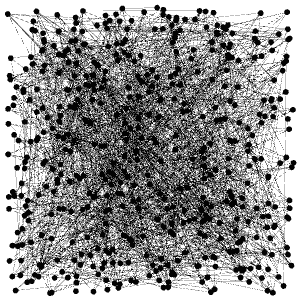
">
<img style="float: left; width: 23%; margin-right: 1%; margin-bottom: 0.5em;" src="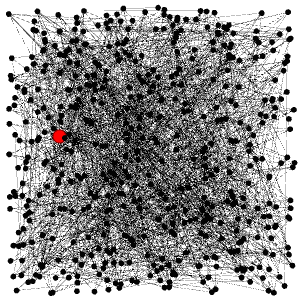
">
<img style="float: left; width: 23%; margin-right: 1%; margin-bottom: 0.5em;" src="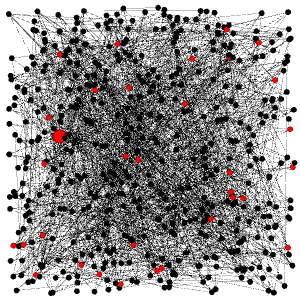
">
<img style="float: left; width: 23%; margin-right: 1%; margin-bottom: 0.5em;" src="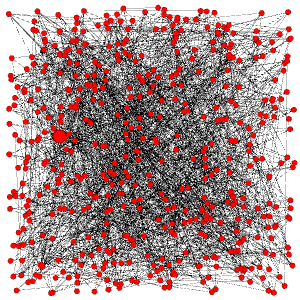
">

**Figure 2 - Dynamic Graph Visualization in Gephi (a-d, left to right).** (a) an Erdos-Renyi graph with 500 nodes has been rendered. (b) the origin of the spreading process has been randomly selected. (c) the spreading process is progressing. (d) the spreading process has completed, infecting all reachable nodes.

The spreading and dynamic processes are implemented as Python classes with functions and methods which perform the additive, detractive, and infection processes on a graph. The simulation itself is driven from a Python function which takes as parameters: the graph, the dynamic model, and the maximum number of time cycles (iterations) to run. The simulation will cycle until either the spreading processes completes (i.e., zero nodes are infected during an interation) or the maximum number of time cycles has elapsed.
  
The source code for this project and all results are provided as an appendix to this Jupyter Notebook, and should be executable given the necessary versions of software packages are installed.

# 3. Results

A series of six experiments were conducted, a baseline on static graphs and five additional runs with varying dynamic process. During each experiment a spreading process was run which initially targeted one node (the origin, or seed node). During each simulated time cycle the spreading process expanded by infecting any uninfected neighbors of all infected nodes.

The six experiments are identified and described below (note, the lettered list label is used to identify the sceanrio with the plots in the following sections):
<p style="text-indent:-16px; padding-left:16px;">**a.** *Baseline (Spreading Only)*. In the baseline scenario we are running just the spreading process. The graphs have no dynamic activity; no adds, no deletes, nothing changes.</p>
<p style="text-indent:-16px; padding-left:16px;">**b.** *Additive Process Only*. In this scenario an additive process was applied to the graphs, thus making them dynamic graphs. 20 nodes were added to the graph at each simulated time cycle. Edges were randomly added to the new nodes giving them a degree comparable to the average degree of the entire graph. The spreading process was run simultaneously.</p>
<p style="text-indent:-16px; padding-left:16px;">**c.** *Random Detractive Process*. In addition to the additive process (adding 20 nodes per time cycle), a detractive process was applied to the graphs. The detractive process removed 20 randomly selected nodes each simulated time cycle. The spreading process was run simultaneously.</p>
<p style="text-indent:-16px; padding-left:16px;">**d.** *Targeted Detractive Process*. A targeted detractive process was deployed with the additive process (adding 20 nodes per time cycle) and the spreading process. At each time cycle, the detractive process removed the node with the highest degree. </p>
<p style="text-indent:-16px; padding-left:16px;">**e.** *Invasive Targeted Detractive Process*. The targetted detractive process was made more invasive. At each time cycle, the detractive process removed 2.5% of nodes by highest degree. This was run along with the additive process (adding 20 nodes per time cycle) and the spreading process.</p>
<p style="text-indent:-16px; padding-left:16px;">**f.** *Extremely Invasive Detractive Process*. The targetted detractive process was made even more invasive. At each time cycle, the detractive process removed 10% of nodes by highest degree. In order to offset the invasive detractive process and keep the graph size approximately the same (in terms of number of nodes), the effectiveness of the additive process was increased to adding 50 nodes per simulated time cycle.</p>

The graphs presented in the following sections show the two spreading metrics of interest:
- **spreading rate** (number of nodes infected over time), as <font color="red">red dashes</font>
- **total spread** which indicates *time to reach saturation*, as <font color="blue">solid blue lines</font>

## 3.1 Exponential graphs (Erdos-Renyi model)

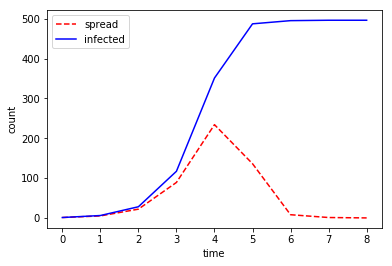
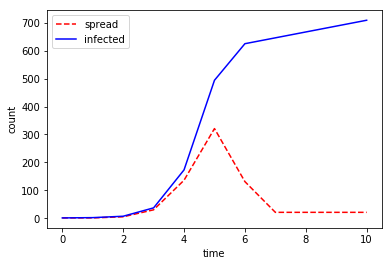
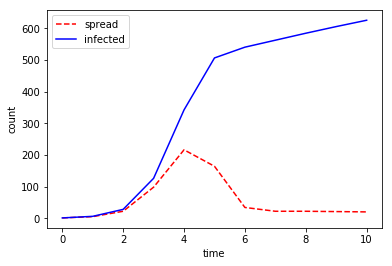
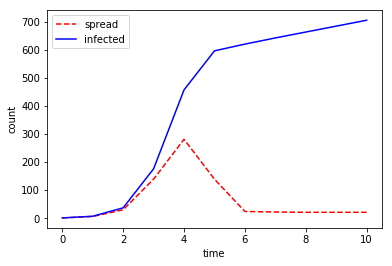
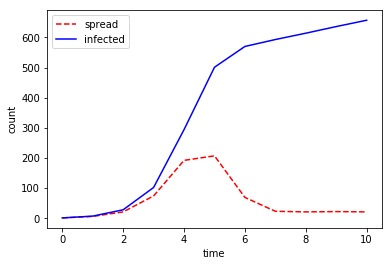
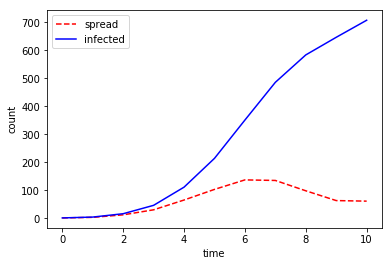

**Figure 3 - Results on Exponential Graphs (a-e, top left to bottom right).** The peak of the red lines indicate the point at which the spreading process was moving the fastest. When the blue line levels off saturation (total spread) has been reached. Note that in (b) nodes are being added at a constant rate, and so total spread continues to grow at a slow linearly pace after time = 6 and the spreading rate never drops to zero; this also occurs in all subsequent scenarios. In (c), (d), and (e) the continued slow linearly growth is due to the oscilation of adding and removing nodes at the same rate. In (f) we observe that the higher amount of churn is causing the total spread to condinue to grow at a slightly greater linear rate, but the spreading rate indicates a leveling off.

## 3.2 Scale-Free graphs (Barabasi-Albert model)

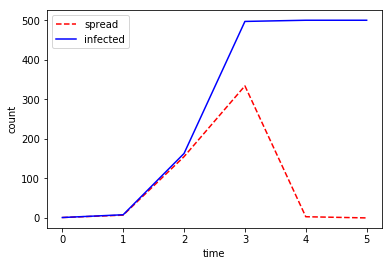
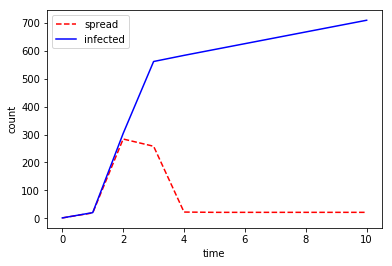
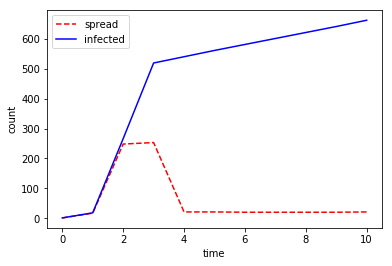
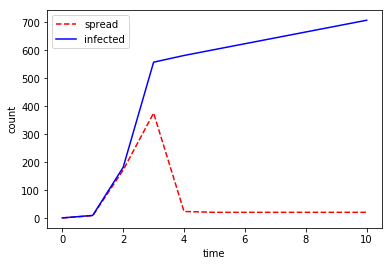
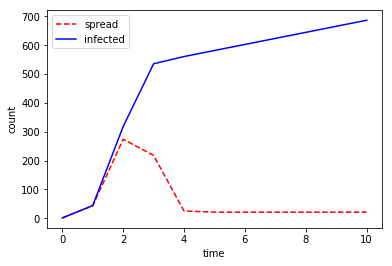
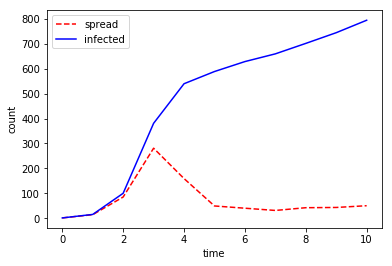

**Figure 4 - Results on Scale-Free Graphs (a-e, top left to bottom right)**. All scenario results are approximately consistent. We observe a sharp spike in spreading at time = 2 or time = 3 which indicates spreading from hubs to a large number of uninfected neighbors. After the spike the spreading rate drops dramatically, almost to zero, indicating that total saturation is reached nearly immediately after the hubs are infected.

# 4. Discussion

## 4.1 Spreading Rate

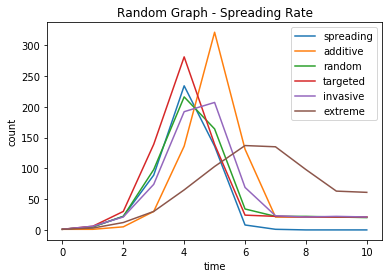
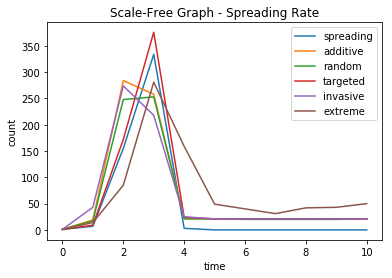

**Figure 5 - Spreading Rate: by graph type, and scenario.** In the random graphs (figure (a), left) the spreading rate for the spreading (no dynamic activity), random detractive, and targeted detractive all peak at time = 4. The additive process peaks at time = 5, suggesting that the extra nodes added delay the sharp rise in spreading rate. Delayed and slower spreading are observed in the invasive and extreme scenarios, where many more nodes are removed each cycle. The scale-free graphs (figure (b), right) show approximately the same spreading rate across all scenarios, with peaks at time = 2 or time = 3, and then sharp drop off which indicates reaching saturation. Only in the extreme scenario does the decay of spreading rate linger to time = 5.

## 4.2 Total Spread (Saturation)

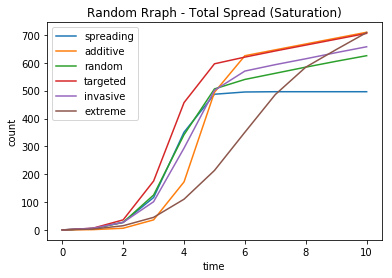
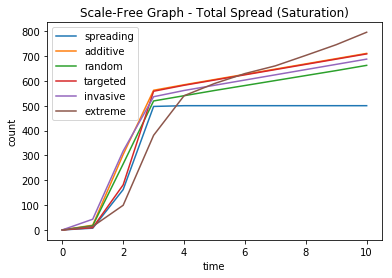

**Figure 6 - Total Spread (Saturation): by graph type, and scenario.** For the random graphs (figure (a), left) we observe that the point of saturation is reached by time = 5 for all scenarios except extreme. In the extreme case we note that the rate of growth is much slower until about time = 4, and then the rate increases. But saturation for extreme must be assumed at time = 10 when the scenario complete. In the final few time cycles the churn in the graph was oscilating between adding uninfected nodes and removing infected notes at an approximately equal rate. In the scale-free graphs the time at which we reach the point of saturation is consistent with the observed peak spreading rate observations (figure 5(b)). Again, only in the case of the extreme scenario is saturation reached later than time = 3. 

# 5. Conclusion

<table>
    <tr><th>Network Type</th><th>Failure<br>(random)</th><th>Attack<br>(targeted)</th><th>Invasive<br>Attack</th></tr>
    <tr><td>Exponential</td><td>tolerant</td><td>tolerant</td><td>vulnerable</td></tr>
    <tr><td>Scale-Free</td><td>tolerant</td><td>tolerant</td><td>tolerant</td></tr>
</table>

**Table 2 - Observed Tolerance in Dynamic Networks.** Both exponential and scale-free dynamic networks exhibit tolerance to random failures and targeted attacks, which is a deviation from the observations in *Error and attack tolerance of complex networks*. In the invasive attack scenarios, the exponential network showed vulnerability as the spreading rate was hindered and saturation was almost not reached. However, perhaps most surprising, is that the scale-free network was very tolerant under the invasive attack scenario.

In this experiment we are not able to conclude that either hypothesis is confirmed true. We suggested that exponential networks would be tolerant to all dynamic activity, but under invasive attack we saw evidence of vulnerability. Also, scale-free networks did not align with what was suggested. In fact, under all attack scenarios no detrimental effect was observed by the removal of hubs. This suggests that there is a greater underlying role provided by the low-degree nodes in dynamic networks [12].

One of the preliminary objectives when we set out was to determine if *the effectiveness of a spreading process can be used as a measure of robustness in dynamic graphs*. We were able to examine two metrics of spreading -- spreading rate, and total spreading (saturation) -- and both measures provided insight into the behavior of different graph models under different dynamic processes. Hence, the results from these experiments support this approach and show the effectiveness of using a spreading process as a measure of robustness in dynamic graphs.

# 6. What's Next?

The logical next step in this area of exploration (or research) would be to enhance the fidelity of the simulation, and perhaps consider other measures of robustness (e.g., diameter, shortest paths, effects on community structures). 

Some additional thoughts on enhancements:
- add fairness by varying the order of execution steps in the dynamic processes
- truly run the dynamic processes concurrently (or in a more fair manner)
- build an event-based mechanism for dynamic processes
- vary the amount of cycle-to-cycle activity of the dynamic processes, while still achieving the desired goal over a longer time span
- run longer simulations, and run with models of real world networks and behavior
- explore dynamic behavior with respect to edges (links)
- consider different spreading phenomena, including models with concepts like reinforcement and resilience (vaccination)
- investigate further into the role of low-degree nodes
- build richer tracking of dynamic processes and finer grained results, in order to gain deeper understanding through detailed "what happened?" analysis
- visualize dynamic graphs with Cubix [15]

# References

1. [F. Harary, G. Gupta, *Dynamic Graph Models*, **Mathl. Comput. Modelling**, Vol.25, No.7, pp.79-87, 1997](https://ac.els-cdn.com/S0895717797000502/1-s2.0-S0895717797000502-main.pdf?_tid=23705148-1961-11e8-b0c7-00000aacb35f&acdnat=1519476751_90ed82f52a37b694b2e9b3b658737b04)
1. [C. Demetrescu, P. Italiano, *Dynamic graphs*, **Handbook on Data Structures and Applications**, Chapter 36. Dinesh Mehta and Sartaj Sahni (eds.), CRC Press Series, in Computer and Information Science, January 2005.](https://www.crcpress.com/Handbook-of-Data-Structures-and-Applications/Mehta-Mehta-Sahni/p/book/9781584884354)
1. *Dynamic connectivity*, **Wikipedia**, 2017
1. [A. Casteigts, P. Flocchini, W. Quattrociocchi, N. Santoro, *Time-Varying Graphs and Dynamic Networks*, **Proc. Adhoc-Now'11**, 2010](http://people.scs.carleton.ca/~santoro/Reports/CFQS11.pdf)
1.  [P. Holme, J. Saramäki, *Temporal networks*](https://arxiv.org/abs/1108.1780)
1.  [A. A. Kochkarov, R. A. Kochkarov, and G. G. Malinetskii, *Issues of Dynamic Graph Theory*, **Computational Mathematics and Mathematical Physics**, 2015, Vol. 55, No. 9, pp. 1590–1596, 2015](https://link.springer.com/article/10.1134/S0965542515090080)
1. A. L. Barabasi, *Network Science*, Cambridge University Press, 2016
1. *Shortest path problem*, **Wikipedia**, https://en.wikipedia.org/wiki/Shortest_path_problem
1. R.Albert, H.Jeong, A.L.Barabasi, *Error and attack tolerance of complex networks*, **Nature**, 406, pp. 378-382, 2000
1. [G. Cattaneo, P. Faruolo, U. Ferraro Petrillo, G.F. Italiano, *Maintaining dynamic minimum spanning trees: An experimental study*, **Discrete Applied Mathematics**, Volume 158, Issue 5, Pages 404-425, 6 March 2010](https://www.sciencedirect.com/science/article/pii/S0166218X09003928)
1. [A. Casteigts, S. Dubois, F. Petit, J. M. Robson, *Robustness in Highly Dynamic Networks*, **Computing Research Repository (CoRR)**, 2017](https://arxiv.org/abs/1703.03190)
1. [G. Tanaka, K. Morino, K. Aihara, *Dynamical robustness in complex networks: the crucial role of low-degree nodes*, **Scientific Reports**, volume 2, Article number: 232, 2012](https://www.nature.com/articles/srep00232)
1. [Gephi Graph Streaming plug-in (https://github.com/gephi/gephi/wiki/GraphStreaming)](https://github.com/gephi/gephi/wiki/GraphStreaming)
1. [Y. Yao, *Visualization of Large Dynamic Networks*, Washington State University, 2013](http://www.eecs.wsu.edu/~yyao/DynamicGraph.html)
1. Cubix, http://www.aviz.fr/cubix
1. [M. Uftring, Exploring Robustness in Dynamic Graphs (video), 2018, https://youtu.be/cIORv3_a5tE](https://youtu.be/cIORv3_a5tE)

# Appendix

# Exploring Gephi Graph Streaming
Sources of information and inspiration:

[Gephi - Graph Streaming](https://github.com/gephi/gephi/wiki/GraphStreaming)

[Visualization of Large Dynamic Networks](http://www.eecs.wsu.edu/~yyao/DynamicGraph.html)


## Versions of software, packages, and libraries used:
- Python 3.6
- Jupyter Notebook 5.4.1
- Gephi 0.92
- requests 2.18.4
- numpy 1.14.2
- NetworkX 2.1
- Matplotlib 2.2.2

Notes:
- [NetworkX: Migration guide from 1.X to 2.0](https://networkx.github.io/documentation/stable/release/migration_guide_from_1.x_to_2.0.html)

# Setup and Foundation

## Gephi Graph Streaming plugin

The Gephi Graph Streaming plugin must be installed. To do this, start Gephi and open the Plugins page (Tools -> Plugins). Switch to the Available Plugins panel, find and select Graph Streaming in the list and click Install. Once complete Gephi may need to restart to enable the plugin.

## Turning on Gephi Master (Streaming)

- Run the Gephi application
- Create an empty workspace (File -> New Project, or Workspace -> New)
- Add some nodes and edges to your graph
- Go to the Streaming tab (next to Appearance in the lower left)
- right-click on the “Master Server” and select “Start”

## Start a Graph Stream

You can obtain a stream of graph events by making a `getGraph` request to Gephi. 

`curl "http://localhost:8080/workspace1?operation=getGraph"`

This will not terminate, it is a live stream of Graph events that will run "forever" (that is, until Gephi Streaming is turned off, Gephi terminates, or the client requesting the stream is stopped).

Note: this is not a required step to run this Notebook, nor is it necessary to use the Gephi Graph Streaming API. It is simply an example, and an effective means to observe a Gephi Graph Stream. 

## Gephi API
Below is a simple implementation of the Gephi Graph Streaming API based on [`GephiJsonClient`](http://www.eecs.wsu.edu/~yyao/DirectedStudyII/src/Citation/GephiJsonClient.py); it is modified for newer version of Python and newer version of Gephi. Also it was changed to use the [`requests`](http://docs.python-requests.org/en/master/) library, which also has the benefit of simplifying the implementation significantly.

### Parameters
**Where is Gephi running?**
- `host` = the name of the machine where Gephi is running
- `port` = the HTTP port for the Gephi REST API
- `workspace` = number of the Gephi workspace

In [82]:
host = "localhost"
port = 8080
workspace = 1

### Build a URL from the parameters
This URL provides access to manipulate the graph in Gephi, note the `operation=updateGraph`. There are other operations which allow querying Gephi for vertex and edge information, and probably others which were not explored in this project.

Each *workspace* in Gephi is a separate space and must be addresed directly; note the `/workspace` part of the URL with a trailing number. Gephi *Graph Streaming* must be turned on for each workspace that we want to acccess.

In [83]:
def gephiURL(host, port, workspace):
    return "http://{}:{}/workspace{}?operation=updateGraph".format(host, port, workspace)

In [84]:
url = gephiURL(host, port, workspace)
print(url)

http://localhost:8080/workspace1?operation=updateGraph


### JSON formatted messages

A JSON document with the specific graph operation is POST'ed to the above URL:
- Vertex operations:
    - `an`: add node
    - `cn`: update node
    - `dn`: delete node
- Edge operations:
    - `ae`: add edge
    - `ce`: update edge
    - `de`: delete edge

Example: *Add Node*
```
{
  "an":{
        "A":{
             "label":"Node A",
             "size":2
            }
  }
}
```

Example: *Add Edge*
```
{
  "ae":{
        "AB":{
              "source":"A",
              "target":"B",
              "directed":false,
              "weight":2
             }
  }
}
```

### Gephi direct access functions

In [85]:
import requests

def post(content):
    #print(content)
    response = requests.post(url, json=content)
    return response

In [86]:
def addVertex(node, attr={}):
    content = {"an":{""+node:attr}}
    return post(content)

def removeVertex(node):
    content = {"dn":{""+node:{}}}
    return post(content)

def changeVertex(node, attr={}):
    content = {"cn":{""+node:attr}}
    return post(content)

def addEdge(eid, source, target, directed=False, weight=1.0):
    attributes = {}
    attributes['source'] = source;
    attributes['target'] = target;
    attributes['directed'] = directed;
    attributes['weight'] = weight
    content = {'ae': {eid:attributes}}
    return post(content)

def removeEdge(eid):
    content = {'de':{eid:{}}}
    return post(content)

def changeEdge(eid, attr={}):
    content = {'ce':{eid:attr}}
    return post(content)

### Gephi convenience functions

In [87]:
def addNode(node):
    return addVertex(str(node), {'label':str(node)})

def addLink(source, target, directed=False, weight=1.0):
    return addEdge("{}-{}".format(str(source), str(target)), str(source), str(target), directed, weight)

def addLinks(links):
    for link in links:
        addLink(link[0], link[1])

def connect(node, neighbors):
    '''
    connect(node, neighbors)
      connect a node to list of neighbors

      Inputs:
        node = the source node
        neighbors = a list of target neighbors
    '''
    for neighbor in neighbors:
        addLink(node, neighbor)

def newNode(node, neighbors):
    '''
    newNode(node, neighbors)
      Create a node node and connect to a list of neighbors

      Inputs:
        node = the new node to be added
        neighbors = a list of neighbors
    '''
    addNode(node)
    connect(node, neighbors)

def deleteNode(node):
    removeVertex(str(node))

BLACK = '#000000'
WHITE = '#ffffff'
RED   = '#ff0000'
GREEN = '#00ff00'
BLUE  = '#0000ff'

def setNodeColor(node, color):
    node = str(node)
    attr = {'color':color}
    return changeVertex(node, attr)

DEFAULT = 10.0
SMALL   = 5.0
MEDIUM  = 15.0
LARGE   = 25.0
XLARGE  = 50.0

def setNodeSize(node, size):
    node = str(node)
    attr = {'size':size}
    return changeVertex(node, attr)


### Create a graph in Gephi

#### custom format -> Gephi

This custom format is a multi-level Python dictionary. The top-level keys represent the vertices of the graph. The values are dictionaries which designate directed edges where the keys are the target vertices and the values are the weights.

In [88]:
graph = {
    's': {'a': 2, 'b': 1},
    'a': {'s': 3, 'b': 4, 'c': 8},
    'b': {'s': 4, 'a': 2, 'd': 2},
    'c': {'a': 2, 'd': 7, 't': 4},
    'd': {'b': 1, 'c': 11, 't': 5},
    't': {'c': 3, 'd': 5}
}

In [89]:
'''
gephiGraphCuston(graph)
  Create a graph in Gephi from custom graph format
  
  Inputs:
    graph = graph in custom format
    
  Notes:
    Creates an undirected and unweighted graph, despite the fact 
    that the custom format allows specifying directed and weighted.
'''
def gephiGraphCuston(graph):
    for node in graph:
        response = addNode(node)
    for node in graph:
        for neighbor in graph[node]:
            response = addLink(node, neighbor)

#### NetworkX -> Gephi
This takes a NetworkX `Graph` and will send a series of commands (for all of the nodes and links) to construct and visualize the graph in Gephi.

In [90]:
'''
gephiGraphNx(graph)
  Create a graph in Gephi from a NetworkX graph
  
  Inputs:
    graph = a NetworkX graph
    
  Notes:
    Creates an undirected and unweighted graph.
'''
def gephiGraphNx(graph):
    for node in graph.nodes():
        result = addNode(str(node))
    for edge in graph.edges():
        source = edge[0]
        target = edge[1]
        result = addLink(str(source), str(target))

## Network Creation functions

In [91]:
import numpy as np
import networkx as nx

'''
barabasi_albert_graph(n, m=1):
    a function that takes `n` the number of nodes for the graph, 
    and `m` the initial number of nodes, as arguments and returns a networkx 
    graph with a scale-free degree distribution.
'''
def barabasi_albert_graph_without_using_degree(n, m=1):
    # create a complete graph with m initial nodes. 
    # (note: we could use nx.complete_graph() here, but opt to do the creation manually
    # to keep the `type` of the graph created as Graph instead of Complete Graph)
    g = nx.Graph()
    for i in range(m):
        g.add_node(i)
        for j in range(i+1,m):
            g.add_edge(i,j)
    
    # while network has less than n nodes, 
    for i in range(m, n):
        # get the list of edges
        edges = [e for e in g.edges]
        # randomly select m of the edges with equal probability
        selected = np.random.choice(len(edges), m, replace=False)
        # create a new node
        g.add_node(i)
        for s in selected:
            # for each of the selected edges, randomly pick one of the nodes
            linkTo = np.random.choice(edges[s], 1)[0]
            # and add an edge from the new node to that node
            g.add_edge(i, linkTo)
    
    return g

## Plotting and Supporting funtions

### Graph Calculations

In [92]:
import networkx as nx

def averageDegree(graph):
    return sum([x[1] for x in list(nx.degree(graph))])/len(nx.nodes(graph))

In [93]:
def probabilityForDegree(N, k):
    return k/(N-1)

In [94]:
import networkx as nx

def graphDegreeTopN(graph, n=10):
    nodes = sorted(list(nx.degree(graph)), key=lambda x: x[1], reverse=True)
    print("{0:4s} {1:8s} {2:8s}".format("N","Node","Degree"))
    print("---- -------- --------")
    for i in range(n):
        print("{0:4d} {1:8d} {2:8d}".format(i+1,nodes[i][0],nodes[i][1]))

### Plot Degree Distribution

In [95]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def showDegreeDistribution(graph):
    degrees = sorted([d[1] for d in graph.degree()])
    (v, e, p) = plt.hist(degrees)
    
def showDegreeDistributionWithFit(graph):
    degrees = sorted([d[1] for d in graph.degree()])
    (y, x, p) = plt.hist(degrees)
    y = np.append(y, [0])
    z = np.polyfit(x, y, 3)
    f = np.poly1d(z)
    x_new = np.linspace(x[0], x[-1], 50)
    y_new = f(x_new)
    plt.plot(x_new, y_new, "r")
    plt.xlim([x[0]-1, x[-1] + 1 ])
    plt.show()
    
def showDegreeDistributionLogScale(graph):
    degrees = sorted([d[1] for d in graph.degree()], reverse=True)
    x = np.arange(0, len(degrees))
    plt.plot(x, degrees, "r")
    plt.xscale('log')
    plt.show()
    
def showDegreeDistributionLogLogScale(graph):
    degrees = sorted([d[1] for d in graph.degree()], reverse=True)
    x = np.arange(0, len(degrees))
    plt.loglog(x, degrees, "r")
    plt.show()

# Method

## Overview
The exploration is essentailly these steps: create a graph, run a simulation which performs a spreading process. The exploration will be run on static graphs where this is no dynamic behavior: no nodes or edges are added or removed. This will act as a baseline from which we can compare the results on dynamic graphs.

The exploration will be performed on:
- static graphs: no dynamic graph activity, just a spreading process
- dynamic graphs: spreading with an addative process
- dynamic graphs: spreading with an addative and random detractive process
- dynamic graphs: spreading with an addative and targeted detractive process
- dynamic graphs: spreading with an addative and more invasive targetted detractive process
- dynamic graphs: spreading with a larger addative and extreme invasive targetted detractive process

## Discussion
- what will be the starting point?
- probably a BA graph (Power Law degree distribution)
- what is the normal dynamic nature?
- adding vertices, and edges
- at what rate?
- how will we control time?
- what are the different fault models?
  - what are the targets? (vertices or edges)
  - failure: random target selected
  - attack: specific target selected
- how are the fault models controlled?
- what is the measure for robustness?
- how will we show the robustness measure?

Ultimately I would like to define, model, and run the simulation from the Jupyter Nodebook. The activity should be visible in the Jupyter Notebook (i.e., printing messages about actions taking place), observe the live activity in Gephi, and at periodic intervals export data which can be displayed in Cubix (separately, after the simulation completes).

## Implementation

### Simulation Driver

In [96]:
import time

def simulate(graph, model, max_iterations = 100):
    spreader = model.spreader()
    grower = model.grower()
    destroyer = model.destroyer()
    
    def init():
        return {'spread':      {'count': {interval: 0}, 'total': {interval: 0}},
                'growth':      {'count': {interval: 0}, 'total': {interval: 0}},
                'destruction': {'count': {interval: 0}, 'total': {interval: 0}}}
    
    def track(tracking, key, count):
        if interval > 0:
            total = tracking[key]['total'][interval-1]
        else:
            total = 0
        tracking[key]['count'][interval] = count
        tracking[key]['total'][interval] = (total + count)
        return

    def spreadingProcess():
        spread = spreader.spread(graph)
        track(tracking, 'spread', spread)
        return spread

    def growingProcess():
        growth = grower.grow(graph)
        track(tracking, 'growth', growth)
        return growth

    def destroyingProcess():
        destruction = destroyer.destroy(graph)
        track(tracking, 'destruction', destruction)
        return destruction

    # start...
    interval = 0
    tracking = init()
    # initial contact to a single 'origin' node
    spread = spreader.spread(graph)
    track(tracking, 'spread', spread)
    # pause a little so we can observe the 'origin' selection
    time.sleep(10)
    
    # run until spreading stops, or the max number of iterations has elapsed
    while (spread != 0) and (interval < max_iterations):
        interval += 1
        # Step 1: run growing
        if grower != None: growth = growingProcess()
        # Step 2: run destruction
        if destroyer != None: destruction = destroyingProcess()
        # Step 3: run spreading
        spread = spreadingProcess()
        # pause so we can observe each iteration's activity
        time.sleep(2)

    return tracking

### Spreading Process

In [97]:
import networkx as nx

class Spreader:
    contagion='infected'
    indicator=RED
    interval = 0
    
    def __init__(self, contagion='infected', indicator=RED):
        self.contagion = contagion
        self.indicator = indicator

    def config(self):
        print("Spreader() contagion: {} indicator: {}".format(self.contagion, self.indicator))
        
    def infect(self, graph, node, size=DEFAULT):
        graph.nodes[node].update({self.contagion: True})
        setNodeColor(node, self.indicator)
        setNodeSize(node, size)

    def initial(self, graph):
        # add the contagion attribute to all nodes
        nx.set_node_attributes(graph, name=self.contagion, values=False)
        # randomly select the origin
        origin = np.random.choice(list(graph.nodes()), 1)[0]
        self.infect(graph, origin, size=LARGE)
        return 1
    
    def incremental(self, graph, infected):
        self.interval += 1
        count = 0
        # infect any uninfected neighbors of the infected nodes
        for node in infected:
            for neighbor in nx.neighbors(graph, node):
                if not graph.nodes.data()[neighbor][self.contagion]:
                    print("time: {0:4d} spread from: {1} -> {2}".format(self.interval, node, neighbor))
                    self.infect(graph, neighbor)
                    count += 1
        return count
    
    def uninitialized(self, graph):
        nodes = [node[0] for node in filter(lambda x: x[1] == None, list(graph.nodes(data=self.contagion)))]
        for node in nodes:
            graph.nodes[node].update({self.contagion: False})
    
    def spread(self, graph):
        infected = [node[0] for node in filter(lambda x: x[1] == True, list(graph.nodes(data=self.contagion)))]
        if len(infected) == 0:
            return self.initial(graph)
        else:
            self.uninitialized(graph)
            return self.incremental(graph, infected)

### Graph trait for additive and detractive processes

In [98]:
class Grapher:
    def __init__(self):
        pass
    
    def graphAdd(self, graph, node, edges, color=BLACK, size=DEFAULT):
        self.graphAddNode(graph, node, color, size)
        self.graphAddEdges(graph, edges)
    
    def graphAddNode(self, graph, node, color=BLACK, size=DEFAULT):
        # add node to NetworkX graph
        graph.add_node(node)
        # add node to Gephi, and set color
        addNode(node)
        setNodeColor(node, color)

    def graphAddEdge(self, graph, source, target):
        # add edge to NetworkX graph
        graph.add_edge(source, target)
        # add edge to Gephi
        addLink(source, target)
    
    def graphAddEdges(self, graph, edges):
        # add edges to NetworkX graph
        graph.add_edges_from(edges)
        # add edges to Gephi
        addLinks(edges)
        
    def graphDeleteNode(self, graph, node):
        # delete node from NetworkX graph
        graph.remove_node(node)
        # delete node in Gephi
        deleteNode(node)

### Additive Process

In [99]:
import numpy as np

class Expander(Grapher):
    interval = 0
    nodes = 0
    links = 0
    next_node = 0
    
    def __init__(self, nodes = 10, links = 10):
        self.nodes = nodes
        self.links = links

    def expand(self, graph):
        self.interval += 0
        nodes = list(graph.nodes())
        if self.next_node == 0:
            self.next_node = max(nodes)
        for i in range(self.nodes + 1):
            self.next_node += 1
            neighbors = np.random.choice(nodes, self.links, replace=False)
            edges = list(zip(np.full(len(neighbors), self.next_node), neighbors))
            self.graphAdd(graph, self.next_node, edges, color=BLUE)
        return self.nodes

class HubCreator(Grapher):
    interval = 0
    number = 3
    threshold = 0.25

    def __init__(self, number = 3, threshold = 0.25):
        self.number = number
        self.threshold = threshold
        
    def create(self, graph):
        self.interval += 0
        created = 0
        # find top `number` of nodes by degree
        # count how many have degree >= threshold?
        # if `count` is less than `number`
        # then create `number` - `count` hubs with degree (`threshold` * graph.number_of_nodes)
        return created
    
class Grower:
    interval = 0
    expander = None
    hubCreator = None
    
    def __init__(self, expander = None, hubCreator = None):
        self.expander = expander
        self.hubCreator = hubCreator

    def grow(self, graph):
        self.interval += 1
        growth = 0
        if self.expander != None: 
            growth += self.expander.expand(graph)
        if self.hubCreator != None:
            growth += self.hubCreator.create(graph)
        return growth

### Detractive Process

In [100]:
import numpy as np

class Target:
    number = 10
    percent = 0.0
    
    def __init__(self, number=10, percent=0.0):
        self.number = number
        self.percent = percent

class TargetRandomNodes(Target):
    def select(self, graph):
        nodes = list(graph.nodes())
        # randomly select a percent of all nodes, or a fixed number of nodes
        if self.percent > 0.0:
            targets = np.random.choice(nodes, int(self.percent * len(nodes)), replace=False)
        else:
            targets = np.random.choice(nodes, self.number, replace=False)
        return targets

class TargetHighDegreeNodes(Target):
    def select(self, graph):
        # get list of nodes ordered by degree, descending (highest -> lowest)
        nodes = [y[0] for y in sorted(list(nx.degree(graph)), key=lambda x: x[1], reverse=True)]
        # select targetted nodes, starting from the head of the list
        if self.percent > 0.0:
            target = nodes[0:int(self.percent * len(nodes))]
        else:
            target = nodes[0:self.number]
        return target
    
class Destroyer(Grapher):
    interval = 0
    target = None
    
    def __init__(self, target=None):
        self.target = target

    def destroy(self, graph):
        self.interval += 1
        count = 0
        if self.target != None:
            selected = self.target.select(graph)
            for node in selected:
                count += 1
                self.graphDeleteNode(graph, node)
        return count

### Model

In [101]:
'''
Model

  Contains the three components of the dynamic model
  - Spreader: responsible for the spreading process
  - Grower: responsibile for dynamically growing the graph
  - Destroyer: destroys elements of the graph

'''
class Model:
    _spreader = None
    _grower = None
    _destroyer = None

    def spreader(self):
        return self._spreader
    
    def grower(self):
        return self._grower
    
    def destroyer(self):
        return self._destroyer

In [102]:
'''
SpreadingOnly

  Provides only a Spreader.
  
'''
class SpreadingOnly(Model):
    def __init__(self, graph = None):
        self._spreader = Spreader()
        self._grower = None
        self._destroyer = None

In [103]:
'''
AdditiveOnly

  Provides a Spreader, and a Grower with an Expander that will add nodes based
  on the `nodes` parameter, and links based on the `links` parameter or the 
  average degree of the graph.
  
'''
class AdditiveOnly(Model):
    def __init__(self, graph, nodes=20, links=-1):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = None

In [104]:
'''
AddativeWithFixedRandomDetractive

  Provides a Spreader, and a Grower with an Expander, and also provides a 
  Destroyer that will TargetRandomNodes on a fixed number basis defined 
  by the `remove` parameter.
  
'''
class AddativeWithFixedRandomDetractive(Model):
    def __init__(self, graph, nodes=20, links=-1, remove=20):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = Destroyer(target=TargetRandomNodes(number = remove, percent = 0.0))

In [105]:
'''
AddativeWithPercentRandomDetractive

  Provides a Spreader, and a Grower with an Expander, and also provides a 
  Destroyer that will TargetRandomNodes on a top-n percentage basis defined 
  by the `percent` parameter.
  
'''
class AddativeWithPercentRandomDetractive(Model):
    def __init__(self, graph, nodes=20, links=-1, percent=0.05):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = Destroyer(target=TargetRandomNodes(number = 0, percent = percent))

In [106]:
'''
AddativeWithTargetedDetractive

  Provides a Spreader, and a Grower with an Expander, and a Destroyer that will
  TargetHighDegreeNodes by number specified by the `remove` parameter..

'''
class AddativeWithTargetedDetractive(Model):
    def __init__(self, graph, nodes=20, links=-1, remove=1):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = Destroyer(target=TargetHighDegreeNodes(number = remove, percent = 0.0))

In [107]:
'''
AddativeWithInvasiveDetractive

  Provides a Spreader, and a Grower with an Expander, and a Destroyer that will
  TargetRandomNodes on a top-n percent basis.
   
'''
class AddativeWithInvasiveDetractive(Model):
    def __init__(self, graph, nodes=20, links=-1, percent=0.025):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = Destroyer(target=TargetHighDegreeNodes(number = 0, percent = percent))

In [108]:
'''
AddativeWithExtremeInvasiveDetractive

  Provides a Spreader, and a Grower with an Expander that has a higher node additive value, 
  and a Destroyer that will TargetRandomNodes with a high top-n percent value.
   
'''
class AddativeWithExtremeInvasiveDetractive(Model):
    def __init__(self, graph, nodes=50, links=-1, percent=0.10):
        if links == -1:
            links = round(averageDegree(graph))
        self._spreader = Spreader()
        self._grower = Grower(expander = Expander(nodes = nodes, 
                                                  links = links), 
                              hubCreator = None)
        self._destroyer = Destroyer(target=TargetHighDegreeNodes(number = 0, percent = percent))

### Results Processing

In [109]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

class Results:
    results = {}
    data = {}
    
    def __init__(self):
        pass
    
    def store(self, tag, results):
        self.results[tag] = results
        self.data[tag] = self.resultsDataFrame(results)
    
    def showResultsTable(self, tag):
        return self.data[tag]
    
    def showSpreading(self, tag):
        results = self.results[tag]
        x = list(results['spread']['count'].keys())
        y1 = list(results['spread']['count'].values())
        y2 = list(results['spread']['total'].values())
        plt.plot(x, y1, "r--", label='spread')
        plt.plot(x, y2, "b", label='infected')
        plt.xlabel('time')
        plt.ylabel('count')
        plt.legend()
        plt.show()
        
    def resultsDataFrame(self, results):
        df = pd.DataFrame(columns=['time',
                                   'spread_count', 'spread_total',
                                   'growth_count', 'growth_total',
                                   'destruction_count', 'destruction_total'])
        times = list(results['spread']['count'].keys())
        df.time = times
        if len(list(results['spread']['count'].values())) == len(times):
            df.spread_count = list(results['spread']['count'].values())
            df.spread_total = list(results['spread']['total'].values())
        if len(list(results['growth']['count'].values())) == len(times):
            df.growth_count = list(results['growth']['count'].values())
            df.growth_total = list(results['growth']['total'].values())
        if len(list(results['destruction']['count'].values())) == len(times):
            df.destruction_count = list(results['destruction']['count'].values())
            df.destruction_total = list(results['destruction']['total'].values())
        return df

### Graph Creation

In [110]:
# Erdos-Renyi graph model
class ErdosRenyiGraph:
    N = 500
    p = 0.01

In [111]:
import networkx as nx

def randomGraph():
    return nx.erdos_renyi_graph(ErdosRenyiGraph.N, ErdosRenyiGraph.p)

In [112]:
# Barabasi-Albert graph model
class BarabasiAlbertGraph:
    N = 500
    m_o = 7

In [113]:
def baGraph():
    return barabasi_albert_graph_without_using_degree(BarabasiAlbertGraph.N, BarabasiAlbertGraph.m_o)

### Simulation Parameters and Run-time

In [114]:
class Simulation:
    max_iterations = 10

In [115]:
results = Results()

# Exploration

## Static Graphs - spreading process only

### Erdos-Renyi (random) graph

In [116]:
url = gephiURL(host, port, 1)
tag = "static-er-spreading-only"

In [117]:
graph1 = randomGraph()

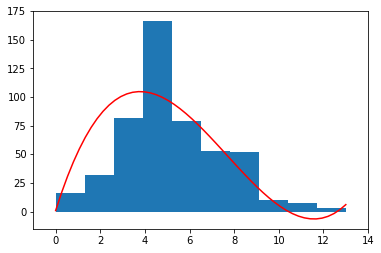

In [118]:
showDegreeDistributionWithFit(graph1)

In [119]:
%%time
gephiGraphNx(graph1)

CPU times: user 4.41 s, sys: 1.01 s, total: 5.42 s
Wall time: 7.05 s


In [120]:
averageDegree(graph1)

5.12

In [121]:
results.store(tag, simulate(graph1, SpreadingOnly(), Simulation.max_iterations))

time:    1 spread from: 57 -> 173
time:    1 spread from: 57 -> 256
time:    1 spread from: 57 -> 269
time:    1 spread from: 57 -> 345
time:    1 spread from: 57 -> 484
time:    2 spread from: 173 -> 29
time:    2 spread from: 173 -> 60
time:    2 spread from: 173 -> 70
time:    2 spread from: 173 -> 84
time:    2 spread from: 173 -> 136
time:    2 spread from: 173 -> 164
time:    2 spread from: 173 -> 200
time:    2 spread from: 173 -> 326
time:    2 spread from: 173 -> 373
time:    2 spread from: 173 -> 435
time:    2 spread from: 256 -> 115
time:    2 spread from: 256 -> 182
time:    2 spread from: 256 -> 230
time:    2 spread from: 256 -> 396
time:    2 spread from: 269 -> 5
time:    2 spread from: 269 -> 20
time:    2 spread from: 269 -> 50
time:    2 spread from: 269 -> 397
time:    2 spread from: 269 -> 408
time:    2 spread from: 484 -> 133
time:    2 spread from: 484 -> 390
time:    2 spread from: 484 -> 416
time:    3 spread from: 5 -> 95
time:    3 spread from: 5 -> 104
tim

time:    4 spread from: 239 -> 305
time:    4 spread from: 243 -> 30
time:    4 spread from: 243 -> 88
time:    4 spread from: 258 -> 16
time:    4 spread from: 258 -> 276
time:    4 spread from: 258 -> 471
time:    4 spread from: 258 -> 499
time:    4 spread from: 280 -> 335
time:    4 spread from: 282 -> 3
time:    4 spread from: 282 -> 157
time:    4 spread from: 282 -> 193
time:    4 spread from: 282 -> 242
time:    4 spread from: 282 -> 268
time:    4 spread from: 293 -> 26
time:    4 spread from: 293 -> 137
time:    4 spread from: 293 -> 165
time:    4 spread from: 293 -> 366
time:    4 spread from: 293 -> 434
time:    4 spread from: 306 -> 149
time:    4 spread from: 306 -> 160
time:    4 spread from: 309 -> 148
time:    4 spread from: 309 -> 257
time:    4 spread from: 309 -> 270
time:    4 spread from: 309 -> 289
time:    4 spread from: 309 -> 418
time:    4 spread from: 309 -> 436
time:    4 spread from: 310 -> 79
time:    4 spread from: 310 -> 130
time:    4 spread from: 310

time:    7 spread from: 163 -> 371


In [122]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,5,6,NaN,NaN,NaN,NaN
2,2,22,28,NaN,NaN,NaN,NaN
3,3,89,117,NaN,NaN,NaN,NaN
4,4,234,351,NaN,NaN,NaN,NaN
5,5,136,487,NaN,NaN,NaN,NaN
6,6,8,495,NaN,NaN,NaN,NaN
7,7,1,496,NaN,NaN,NaN,NaN
8,8,0,496,NaN,NaN,NaN,NaN


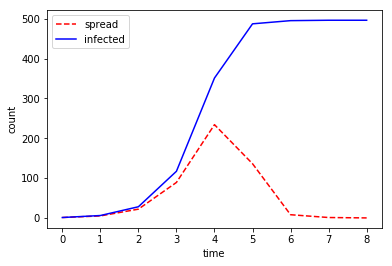

In [123]:
results.showSpreading(tag)

### Barabasi-Albert graph

In [127]:
url = gephiURL(host, port, 2)
tag = "static-ba-spreading-only"

In [128]:
graph2 = baGraph()

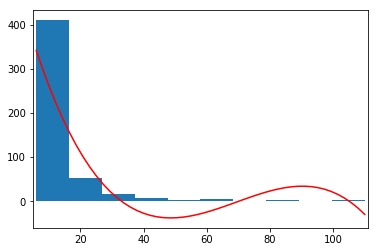

In [129]:
showDegreeDistributionWithFit(graph2)

In [130]:
%%time
gephiGraphNx(graph2)

CPU times: user 9.11 s, sys: 1.99 s, total: 11.1 s
Wall time: 14.9 s


In [131]:
averageDegree(graph2)

13.508

In [132]:
graphDegreeTopN(graph2)

N    Node     Degree  
---- -------- --------
   1        3      110
   2       11      109
   3        5       96
   4        1       85
   5        6       80
   6       24       70
   7       17       66
   8        0       63
   9        7       62
  10        4       61


In [133]:
results.store(tag, simulate(graph2, SpreadingOnly(), Simulation.max_iterations))

time:    1 spread from: 403 -> 57
time:    1 spread from: 403 -> 11
time:    1 spread from: 403 -> 311
time:    1 spread from: 403 -> 293
time:    1 spread from: 403 -> 99
time:    1 spread from: 403 -> 363
time:    1 spread from: 403 -> 479
time:    2 spread from: 11 -> 3
time:    2 spread from: 11 -> 1
time:    2 spread from: 11 -> 10
time:    2 spread from: 11 -> 5
time:    2 spread from: 11 -> 4
time:    2 spread from: 11 -> 7
time:    2 spread from: 11 -> 14
time:    2 spread from: 11 -> 15
time:    2 spread from: 11 -> 17
time:    2 spread from: 11 -> 20
time:    2 spread from: 11 -> 21
time:    2 spread from: 11 -> 23
time:    2 spread from: 11 -> 26
time:    2 spread from: 11 -> 27
time:    2 spread from: 11 -> 32
time:    2 spread from: 11 -> 33
time:    2 spread from: 11 -> 34
time:    2 spread from: 11 -> 35
time:    2 spread from: 11 -> 42
time:    2 spread from: 11 -> 44
time:    2 spread from: 11 -> 45
time:    2 spread from: 11 -> 46
time:    2 spread from: 11 -> 47
time

time:    3 spread from: 3 -> 30
time:    3 spread from: 3 -> 31
time:    3 spread from: 3 -> 36
time:    3 spread from: 3 -> 38
time:    3 spread from: 3 -> 39
time:    3 spread from: 3 -> 41
time:    3 spread from: 3 -> 48
time:    3 spread from: 3 -> 64
time:    3 spread from: 3 -> 69
time:    3 spread from: 3 -> 71
time:    3 spread from: 3 -> 74
time:    3 spread from: 3 -> 78
time:    3 spread from: 3 -> 87
time:    3 spread from: 3 -> 88
time:    3 spread from: 3 -> 89
time:    3 spread from: 3 -> 93
time:    3 spread from: 3 -> 115
time:    3 spread from: 3 -> 127
time:    3 spread from: 3 -> 143
time:    3 spread from: 3 -> 144
time:    3 spread from: 3 -> 150
time:    3 spread from: 3 -> 155
time:    3 spread from: 3 -> 165
time:    3 spread from: 3 -> 175
time:    3 spread from: 3 -> 199
time:    3 spread from: 3 -> 204
time:    3 spread from: 3 -> 218
time:    3 spread from: 3 -> 226
time:    3 spread from: 3 -> 230
time:    3 spread from: 3 -> 245
time:    3 spread from: 3 

time:    4 spread from: 6 -> 438
time:    4 spread from: 12 -> 470
time:    4 spread from: 13 -> 465


In [134]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,7,8,NaN,NaN,NaN,NaN
2,2,155,163,NaN,NaN,NaN,NaN
3,3,334,497,NaN,NaN,NaN,NaN
4,4,3,500,NaN,NaN,NaN,NaN
5,5,0,500,NaN,NaN,NaN,NaN


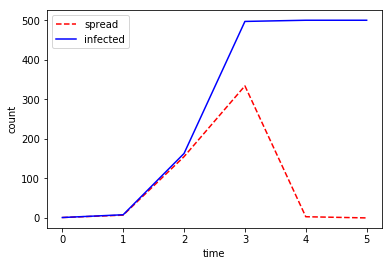

In [135]:
results.showSpreading(tag)

## Dynamic Graphs - spreading with additive process

### Erdos-Renyi (random) graph

In [136]:
url = gephiURL(host, port, 3)
tag = "dynamic-er-additive-only"

In [137]:
graph3 = randomGraph()

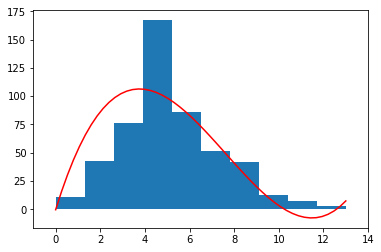

In [138]:
showDegreeDistributionWithFit(graph3)

In [139]:
%%time
gephiGraphNx(graph3)

CPU times: user 3.96 s, sys: 831 ms, total: 4.79 s
Wall time: 6.12 s


In [140]:
averageDegree(graph3)

5.1

In [141]:
results.store(tag, simulate(graph3, AdditiveOnly(graph3), Simulation.max_iterations))

time:    1 spread from: 191 -> 160
time:    2 spread from: 160 -> 126
time:    2 spread from: 160 -> 200
time:    2 spread from: 160 -> 335
time:    2 spread from: 160 -> 439
time:    2 spread from: 191 -> 526
time:    3 spread from: 126 -> 344
time:    3 spread from: 126 -> 411
time:    3 spread from: 126 -> 418
time:    3 spread from: 126 -> 441
time:    3 spread from: 126 -> 447
time:    3 spread from: 191 -> 550
time:    3 spread from: 200 -> 45
time:    3 spread from: 200 -> 65
time:    3 spread from: 200 -> 67
time:    3 spread from: 200 -> 77
time:    3 spread from: 200 -> 157
time:    3 spread from: 200 -> 207
time:    3 spread from: 200 -> 222
time:    3 spread from: 200 -> 342
time:    3 spread from: 200 -> 424
time:    3 spread from: 335 -> 187
time:    3 spread from: 335 -> 299
time:    3 spread from: 335 -> 351
time:    3 spread from: 335 -> 396
time:    3 spread from: 335 -> 431
time:    3 spread from: 335 -> 458
time:    3 spread from: 439 -> 390
time:    3 spread from: 

time:    5 spread from: 116 -> 540
time:    5 spread from: 119 -> 340
time:    5 spread from: 119 -> 391
time:    5 spread from: 119 -> 402
time:    5 spread from: 119 -> 446
time:    5 spread from: 120 -> 142
time:    5 spread from: 120 -> 541
time:    5 spread from: 128 -> 86
time:    5 spread from: 128 -> 176
time:    5 spread from: 128 -> 355
time:    5 spread from: 128 -> 358
time:    5 spread from: 128 -> 366
time:    5 spread from: 129 -> 61
time:    5 spread from: 129 -> 123
time:    5 spread from: 129 -> 210
time:    5 spread from: 129 -> 338
time:    5 spread from: 129 -> 434
time:    5 spread from: 129 -> 494
time:    5 spread from: 129 -> 583
time:    5 spread from: 133 -> 217
time:    5 spread from: 133 -> 353
time:    5 spread from: 133 -> 360
time:    5 spread from: 133 -> 603
time:    5 spread from: 136 -> 218
time:    5 spread from: 136 -> 248
time:    5 spread from: 140 -> 94
time:    5 spread from: 140 -> 585
time:    5 spread from: 149 -> 7
time:    5 spread from: 1

time:    6 spread from: 0 -> 212
time:    6 spread from: 1 -> 608
time:    6 spread from: 3 -> 71
time:    6 spread from: 3 -> 489
time:    6 spread from: 8 -> 72
time:    6 spread from: 8 -> 303
time:    6 spread from: 11 -> 35
time:    6 spread from: 11 -> 100
time:    6 spread from: 11 -> 255
time:    6 spread from: 14 -> 69
time:    6 spread from: 14 -> 415
time:    6 spread from: 17 -> 615
time:    6 spread from: 20 -> 475
time:    6 spread from: 23 -> 613
time:    6 spread from: 24 -> 179
time:    6 spread from: 24 -> 426
time:    6 spread from: 27 -> 277
time:    6 spread from: 27 -> 311
time:    6 spread from: 28 -> 15
time:    6 spread from: 28 -> 195
time:    6 spread from: 28 -> 298
time:    6 spread from: 28 -> 334
time:    6 spread from: 28 -> 368
time:    6 spread from: 32 -> 313
time:    6 spread from: 34 -> 542
time:    6 spread from: 34 -> 595
time:    6 spread from: 36 -> 125
time:    6 spread from: 36 -> 322
time:    6 spread from: 38 -> 403
time:    6 spread from: 4

In [142]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,NaN,NaN
1,1,1,2,20,20,NaN,NaN
2,2,5,7,20,40,NaN,NaN
3,3,30,37,20,60,NaN,NaN
4,4,136,173,20,80,NaN,NaN
5,5,321,494,20,100,NaN,NaN
6,6,131,625,20,120,NaN,NaN
7,7,21,646,20,140,NaN,NaN
8,8,21,667,20,160,NaN,NaN
9,9,21,688,20,180,NaN,NaN


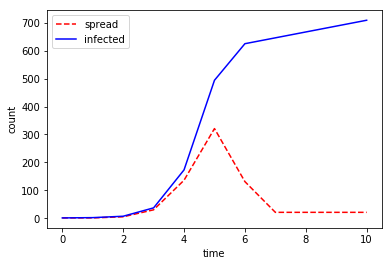

In [143]:
results.showSpreading(tag)

### Barabasi-Albert graph

In [144]:
url = gephiURL(host, port, 4)
tag = "dynamic-ba-additive-only"

In [145]:
graph4 = baGraph()

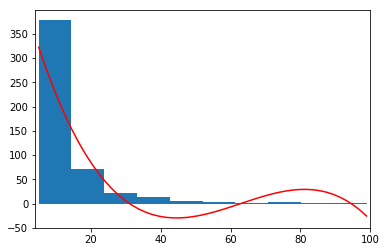

In [146]:
showDegreeDistributionWithFit(graph4)

In [147]:
%%time
gephiGraphNx(graph4)

CPU times: user 8.62 s, sys: 1.85 s, total: 10.5 s
Wall time: 12.9 s


In [148]:
averageDegree(graph4)

13.4

In [149]:
graphDegreeTopN(graph4)

N    Node     Degree  
---- -------- --------
   1        6       99
   2        2       84
   3        3       79
   4        4       75
   5        5       71
   6        9       67
   7       15       62
   8        0       61
   9        1       59
  10       12       52


In [150]:
results.store(tag, simulate(graph4, AdditiveOnly(graph4), Simulation.max_iterations))

time:    1 spread from: 205 -> 76
time:    1 spread from: 205 -> 28
time:    1 spread from: 205 -> 80
time:    1 spread from: 205 -> 39
time:    1 spread from: 205 -> 3
time:    1 spread from: 205 -> 2
time:    1 spread from: 205 -> 7
time:    1 spread from: 205 -> 206
time:    1 spread from: 205 -> 209
time:    1 spread from: 205 -> 223
time:    1 spread from: 205 -> 286
time:    1 spread from: 205 -> 307
time:    1 spread from: 205 -> 356
time:    1 spread from: 205 -> 373
time:    1 spread from: 205 -> 390
time:    1 spread from: 205 -> 407
time:    1 spread from: 205 -> 416
time:    1 spread from: 205 -> 436
time:    1 spread from: 205 -> 508
time:    2 spread from: 2 -> 0
time:    2 spread from: 2 -> 1
time:    2 spread from: 2 -> 4
time:    2 spread from: 2 -> 5
time:    2 spread from: 2 -> 6
time:    2 spread from: 2 -> 9
time:    2 spread from: 2 -> 11
time:    2 spread from: 2 -> 13
time:    2 spread from: 2 -> 15
time:    2 spread from: 2 -> 16
time:    2 spread from: 2 -> 17

time:    2 spread from: 206 -> 37
time:    2 spread from: 206 -> 115
time:    2 spread from: 206 -> 338
time:    2 spread from: 206 -> 510
time:    2 spread from: 209 -> 114
time:    2 spread from: 209 -> 18
time:    2 spread from: 209 -> 237
time:    2 spread from: 209 -> 252
time:    2 spread from: 223 -> 27
time:    2 spread from: 223 -> 57
time:    2 spread from: 223 -> 175
time:    2 spread from: 223 -> 377
time:    2 spread from: 223 -> 522
time:    2 spread from: 223 -> 537
time:    2 spread from: 286 -> 228
time:    2 spread from: 286 -> 293
time:    2 spread from: 286 -> 297
time:    2 spread from: 286 -> 339
time:    2 spread from: 356 -> 258
time:    2 spread from: 356 -> 395
time:    2 spread from: 356 -> 412
time:    2 spread from: 373 -> 312
time:    2 spread from: 373 -> 362
time:    2 spread from: 373 -> 513
time:    2 spread from: 390 -> 314
time:    2 spread from: 390 -> 202
time:    2 spread from: 390 -> 89
time:    2 spread from: 390 -> 42
time:    2 spread from: 39

time:    3 spread from: 42 -> 225
time:    3 spread from: 42 -> 490
time:    3 spread from: 45 -> 288
time:    3 spread from: 45 -> 517
time:    3 spread from: 47 -> 560
time:    3 spread from: 50 -> 408
time:    3 spread from: 50 -> 457
time:    3 spread from: 52 -> 146
time:    3 spread from: 52 -> 157
time:    3 spread from: 52 -> 227
time:    3 spread from: 52 -> 435
time:    3 spread from: 53 -> 301
time:    3 spread from: 55 -> 552
time:    3 spread from: 63 -> 355
time:    3 spread from: 65 -> 283
time:    3 spread from: 66 -> 509
time:    3 spread from: 67 -> 298
time:    3 spread from: 67 -> 300
time:    3 spread from: 71 -> 196
time:    3 spread from: 72 -> 475
time:    3 spread from: 82 -> 263
time:    3 spread from: 85 -> 527
time:    3 spread from: 85 -> 530
time:    3 spread from: 92 -> 449
time:    3 spread from: 92 -> 548
time:    3 spread from: 96 -> 447
time:    3 spread from: 101 -> 268
time:    3 spread from: 111 -> 536
time:    3 spread from: 118 -> 478
time:    3 

In [151]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,NaN,NaN
1,1,19,20,20,20,NaN,NaN
2,2,284,304,20,40,NaN,NaN
3,3,258,562,20,60,NaN,NaN
4,4,22,584,20,80,NaN,NaN
5,5,21,605,20,100,NaN,NaN
6,6,21,626,20,120,NaN,NaN
7,7,21,647,20,140,NaN,NaN
8,8,21,668,20,160,NaN,NaN
9,9,21,689,20,180,NaN,NaN


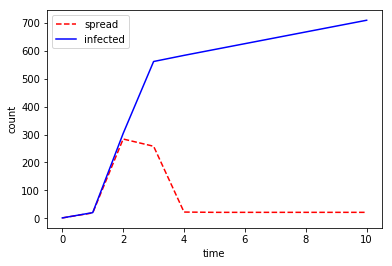

In [152]:
results.showSpreading(tag)

## Dynamic Graphs - spreading with addative and random detractive

### Erdos-Renyi (random) graph

In [153]:
url = gephiURL(host, port, 5)
tag = "dynamic-er-additive-with-random-detractive"

In [154]:
graph5 = randomGraph()

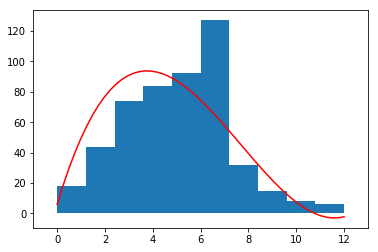

In [155]:
showDegreeDistributionWithFit(graph5)

In [156]:
%%time
gephiGraphNx(graph5)

CPU times: user 3.94 s, sys: 820 ms, total: 4.76 s
Wall time: 5.93 s


In [157]:
averageDegree(graph5)

4.968

In [158]:
results.store(tag, simulate(graph5, AddativeWithFixedRandomDetractive(graph5), Simulation.max_iterations))

time:    1 spread from: 262 -> 40
time:    1 spread from: 262 -> 141
time:    1 spread from: 262 -> 301
time:    1 spread from: 262 -> 426
time:    1 spread from: 262 -> 507
time:    2 spread from: 40 -> 125
time:    2 spread from: 40 -> 541
time:    2 spread from: 141 -> 1
time:    2 spread from: 141 -> 111
time:    2 spread from: 141 -> 233
time:    2 spread from: 141 -> 361
time:    2 spread from: 262 -> 529
time:    2 spread from: 301 -> 76
time:    2 spread from: 301 -> 181
time:    2 spread from: 301 -> 384
time:    2 spread from: 301 -> 458
time:    2 spread from: 426 -> 46
time:    2 spread from: 426 -> 65
time:    2 spread from: 426 -> 89
time:    2 spread from: 426 -> 148
time:    2 spread from: 426 -> 310
time:    2 spread from: 426 -> 385
time:    2 spread from: 426 -> 386
time:    2 spread from: 426 -> 535
time:    2 spread from: 507 -> 114
time:    2 spread from: 507 -> 442
time:    2 spread from: 507 -> 348
time:    3 spread from: 1 -> 315
time:    3 spread from: 1 -> 55

time:    4 spread from: 197 -> 422
time:    4 spread from: 197 -> 545
time:    4 spread from: 199 -> 251
time:    4 spread from: 199 -> 295
time:    4 spread from: 199 -> 330
time:    4 spread from: 206 -> 39
time:    4 spread from: 206 -> 353
time:    4 spread from: 206 -> 533
time:    4 spread from: 207 -> 134
time:    4 spread from: 207 -> 180
time:    4 spread from: 207 -> 350
time:    4 spread from: 207 -> 425
time:    4 spread from: 214 -> 159
time:    4 spread from: 214 -> 189
time:    4 spread from: 214 -> 407
time:    4 spread from: 222 -> 3
time:    4 spread from: 222 -> 24
time:    4 spread from: 222 -> 73
time:    4 spread from: 222 -> 96
time:    4 spread from: 222 -> 317
time:    4 spread from: 222 -> 500
time:    4 spread from: 224 -> 78
time:    4 spread from: 225 -> 26
time:    4 spread from: 225 -> 109
time:    4 spread from: 225 -> 154
time:    4 spread from: 225 -> 255
time:    4 spread from: 245 -> 139
time:    4 spread from: 245 -> 208
time:    4 spread from: 245 

time:    5 spread from: 468 -> 355
time:    5 spread from: 473 -> 495
time:    5 spread from: 480 -> 450
time:    5 spread from: 482 -> 66
time:    5 spread from: 482 -> 246
time:    5 spread from: 482 -> 488
time:    5 spread from: 499 -> 302
time:    5 spread from: 499 -> 478
time:    5 spread from: 502 -> 226
time:    5 spread from: 515 -> 394
time:    5 spread from: 527 -> 23
time:    5 spread from: 530 -> 314
time:    5 spread from: 536 -> 518
time:    5 spread from: 569 -> 127
time:    5 spread from: 574 -> 396
time:    5 spread from: 576 -> 404
time:    5 spread from: 577 -> 387
time:    6 spread from: 0 -> 607
time:    6 spread from: 3 -> 609
time:    6 spread from: 5 -> 614
time:    6 spread from: 14 -> 608
time:    6 spread from: 24 -> 625
time:    6 spread from: 31 -> 487
time:    6 spread from: 45 -> 621
time:    6 spread from: 49 -> 25
time:    6 spread from: 51 -> 622
time:    6 spread from: 87 -> 612
time:    6 spread from: 88 -> 147
time:    6 spread from: 96 -> 606
tim

In [159]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,5,6,20,20,20,20
2,2,22,28,20,40,20,40
3,3,98,126,20,60,20,60
4,4,216,342,20,80,20,80
5,5,164,506,20,100,20,100
6,6,34,540,20,120,20,120
7,7,22,562,20,140,20,140
8,8,22,584,20,160,20,160
9,9,21,605,20,180,20,180


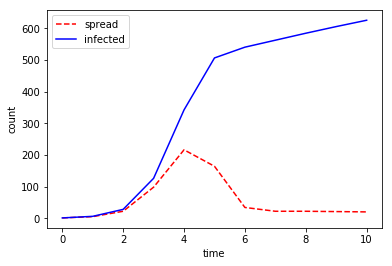

In [160]:
results.showSpreading(tag)

### Barabasi-Albert graph

In [161]:
url = gephiURL(host, port, 6)
tag = "dynamic-ba-additive-with-random-detractive"

In [162]:
graph6 = baGraph()

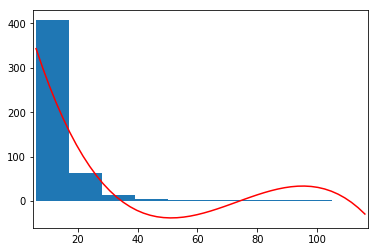

In [163]:
showDegreeDistributionWithFit(graph6)

In [164]:
%%time
gephiGraphNx(graph6)

CPU times: user 8.91 s, sys: 1.9 s, total: 10.8 s
Wall time: 13.5 s


In [165]:
averageDegree(graph6)

13.452

In [166]:
graphDegreeTopN(graph6)

N    Node     Degree  
---- -------- --------
   1        3      116
   2        6       98
   3        7       94
   4        1       93
   5       11       90
   6        4       79
   7       13       76
   8        8       70
   9        2       65
  10       24       51


In [167]:
results.store(tag, simulate(graph6, AddativeWithFixedRandomDetractive(graph6), Simulation.max_iterations))

time:    1 spread from: 59 -> 50
time:    1 spread from: 59 -> 1
time:    1 spread from: 59 -> 48
time:    1 spread from: 59 -> 7
time:    1 spread from: 59 -> 11
time:    1 spread from: 59 -> 0
time:    1 spread from: 59 -> 18
time:    1 spread from: 59 -> 69
time:    1 spread from: 59 -> 111
time:    1 spread from: 59 -> 124
time:    1 spread from: 59 -> 192
time:    1 spread from: 59 -> 299
time:    1 spread from: 59 -> 301
time:    1 spread from: 59 -> 337
time:    1 spread from: 59 -> 366
time:    1 spread from: 59 -> 408
time:    1 spread from: 59 -> 451
time:    2 spread from: 0 -> 2
time:    2 spread from: 0 -> 3
time:    2 spread from: 0 -> 4
time:    2 spread from: 0 -> 5
time:    2 spread from: 0 -> 6
time:    2 spread from: 0 -> 10
time:    2 spread from: 0 -> 22
time:    2 spread from: 0 -> 23
time:    2 spread from: 0 -> 29
time:    2 spread from: 0 -> 37
time:    2 spread from: 0 -> 53
time:    2 spread from: 0 -> 71
time:    2 spread from: 0 -> 76
time:    2 spread from

time:    3 spread from: 2 -> 19
time:    3 spread from: 2 -> 32
time:    3 spread from: 2 -> 44
time:    3 spread from: 2 -> 49
time:    3 spread from: 2 -> 60
time:    3 spread from: 2 -> 77
time:    3 spread from: 2 -> 87
time:    3 spread from: 2 -> 127
time:    3 spread from: 2 -> 143
time:    3 spread from: 2 -> 167
time:    3 spread from: 2 -> 171
time:    3 spread from: 2 -> 222
time:    3 spread from: 2 -> 279
time:    3 spread from: 2 -> 294
time:    3 spread from: 2 -> 311
time:    3 spread from: 2 -> 371
time:    3 spread from: 2 -> 374
time:    3 spread from: 2 -> 396
time:    3 spread from: 2 -> 420
time:    3 spread from: 2 -> 431
time:    3 spread from: 2 -> 447
time:    3 spread from: 2 -> 459
time:    3 spread from: 2 -> 461
time:    3 spread from: 2 -> 462
time:    3 spread from: 2 -> 466
time:    3 spread from: 2 -> 477
time:    3 spread from: 2 -> 486
time:    3 spread from: 2 -> 490
time:    3 spread from: 2 -> 508
time:    3 spread from: 3 -> 46
time:    3 spread 

time:    4 spread from: 3 -> 576
time:    4 spread from: 8 -> 568
time:    4 spread from: 9 -> 565
time:    4 spread from: 9 -> 566
time:    4 spread from: 12 -> 579
time:    4 spread from: 14 -> 569
time:    4 spread from: 14 -> 570
time:    4 spread from: 17 -> 572
time:    4 spread from: 17 -> 574
time:    4 spread from: 24 -> 582
time:    4 spread from: 27 -> 567
time:    4 spread from: 31 -> 581
time:    4 spread from: 38 -> 578
time:    4 spread from: 39 -> 571
time:    4 spread from: 48 -> 563
time:    4 spread from: 50 -> 575
time:    4 spread from: 66 -> 583
time:    4 spread from: 75 -> 573
time:    4 spread from: 91 -> 564
time:    4 spread from: 113 -> 580
time:    4 spread from: 128 -> 577
time:    5 spread from: 4 -> 591
time:    5 spread from: 6 -> 603
time:    5 spread from: 8 -> 599
time:    5 spread from: 9 -> 586
time:    5 spread from: 13 -> 588
time:    5 spread from: 13 -> 590
time:    5 spread from: 16 -> 604
time:    5 spread from: 27 -> 585
time:    5 spread fr

In [168]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,17,18,20,20,20,20
2,2,248,266,20,40,20,40
3,3,253,519,20,60,20,60
4,4,21,540,20,80,20,80
5,5,21,561,20,100,20,100
6,6,20,581,20,120,20,120
7,7,20,601,20,140,20,140
8,8,20,621,20,160,20,160
9,9,20,641,20,180,20,180


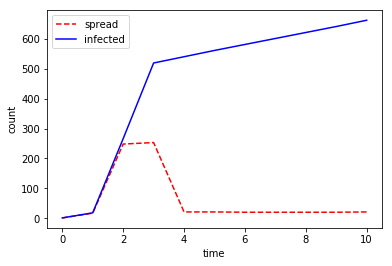

In [169]:
results.showSpreading(tag)

In [170]:
graphDegreeTopN(graph6)

N    Node     Degree  
---- -------- --------
   1        6       68
   2        7       63
   3       11       63
   4        4       56
   5       13       55
   6        8       53
   7        2       46
   8       24       40
   9       26       35
  10       17       30


## Dynamic Graphs - addative and targeted detractive

### Erdos-Renyi (random) graph

In [171]:
url = gephiURL(host, port, 7)
tag = "dynamic-er-additive-with-targeted-detractive"

In [172]:
graph7 = randomGraph()

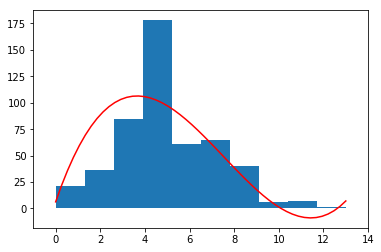

In [173]:
showDegreeDistributionWithFit(graph7)

In [174]:
%%time
gephiGraphNx(graph7)

CPU times: user 4.2 s, sys: 621 ms, total: 4.82 s
Wall time: 6.15 s


In [175]:
averageDegree(graph7)

4.904

In [176]:
graphDegreeTopN(graph7)

N    Node     Degree  
---- -------- --------
   1      102       13
   2       57       11
   3       95       11
   4      196       11
   5      284       11
   6      328       11
   7      338       11
   8      491       11
   9        8       10
  10      121       10


In [177]:
results.store(tag, simulate(graph7, AddativeWithTargetedDetractive(graph7), Simulation.max_iterations))

time:    1 spread from: 28 -> 56
time:    1 spread from: 28 -> 144
time:    1 spread from: 28 -> 197
time:    1 spread from: 28 -> 324
time:    1 spread from: 28 -> 381
time:    1 spread from: 28 -> 491
time:    2 spread from: 56 -> 61
time:    2 spread from: 56 -> 255
time:    2 spread from: 56 -> 308
time:    2 spread from: 56 -> 328
time:    2 spread from: 56 -> 464
time:    2 spread from: 197 -> 168
time:    2 spread from: 197 -> 250
time:    2 spread from: 197 -> 291
time:    2 spread from: 197 -> 435
time:    2 spread from: 197 -> 476
time:    2 spread from: 324 -> 193
time:    2 spread from: 324 -> 244
time:    2 spread from: 324 -> 333
time:    2 spread from: 324 -> 352
time:    2 spread from: 324 -> 366
time:    2 spread from: 324 -> 395
time:    2 spread from: 381 -> 98
time:    2 spread from: 381 -> 130
time:    2 spread from: 381 -> 154
time:    2 spread from: 381 -> 385
time:    2 spread from: 381 -> 484
time:    2 spread from: 491 -> 181
time:    2 spread from: 491 -> 210

time:    4 spread from: 71 -> 69
time:    4 spread from: 71 -> 433
time:    4 spread from: 72 -> 227
time:    4 spread from: 72 -> 437
time:    4 spread from: 77 -> 24
time:    4 spread from: 95 -> 54
time:    4 spread from: 95 -> 188
time:    4 spread from: 95 -> 312
time:    4 spread from: 95 -> 338
time:    4 spread from: 95 -> 345
time:    4 spread from: 100 -> 306
time:    4 spread from: 103 -> 26
time:    4 spread from: 103 -> 402
time:    4 spread from: 103 -> 564
time:    4 spread from: 106 -> 104
time:    4 spread from: 106 -> 353
time:    4 spread from: 106 -> 506
time:    4 spread from: 113 -> 23
time:    4 spread from: 113 -> 233
time:    4 spread from: 115 -> 164
time:    4 spread from: 115 -> 508
time:    4 spread from: 115 -> 537
time:    4 spread from: 117 -> 112
time:    4 spread from: 117 -> 149
time:    4 spread from: 117 -> 204
time:    4 spread from: 117 -> 359
time:    4 spread from: 117 -> 461
time:    4 spread from: 117 -> 514
time:    4 spread from: 119 -> 16
t

time:    5 spread from: 38 -> 595
time:    5 spread from: 40 -> 603
time:    5 spread from: 41 -> 457
time:    5 spread from: 44 -> 171
time:    5 spread from: 44 -> 323
time:    5 spread from: 45 -> 269
time:    5 spread from: 46 -> 598
time:    5 spread from: 48 -> 99
time:    5 spread from: 48 -> 302
time:    5 spread from: 48 -> 422
time:    5 spread from: 48 -> 593
time:    5 spread from: 51 -> 182
time:    5 spread from: 54 -> 175
time:    5 spread from: 54 -> 585
time:    5 spread from: 56 -> 591
time:    5 spread from: 58 -> 372
time:    5 spread from: 59 -> 455
time:    5 spread from: 64 -> 169
time:    5 spread from: 65 -> 11
time:    5 spread from: 66 -> 166
time:    5 spread from: 66 -> 179
time:    5 spread from: 67 -> 134
time:    5 spread from: 67 -> 568
time:    5 spread from: 69 -> 52
time:    5 spread from: 69 -> 320
time:    5 spread from: 69 -> 532
time:    5 spread from: 73 -> 0
time:    5 spread from: 73 -> 450
time:    5 spread from: 73 -> 528
time:    5 spread f

In [178]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,6,7,20,20,1,1
2,2,30,37,20,40,1,2
3,3,139,176,20,60,1,3
4,4,281,457,20,80,1,4
5,5,139,596,20,100,1,5
6,6,24,620,20,120,1,6
7,7,22,642,20,140,1,7
8,8,21,663,20,160,1,8
9,9,21,684,20,180,1,9


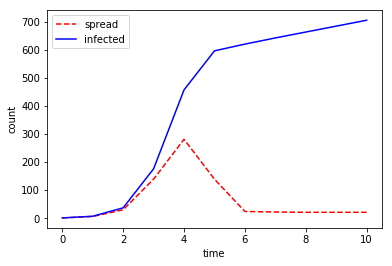

In [179]:
results.showSpreading(tag)

In [180]:
graphDegreeTopN(graph7)

N    Node     Degree  
---- -------- --------
   1      237       13
   2       32       12
   3       57       12
   4      196       12
   5      200       12
   6      284       12
   7      338       12
   8      445       12
   9       48       11
  10       69       11


### Barabasi-Albert graph

In [181]:
url = gephiURL(host, port, 8)
tag = "dynamic-ba-additive-with-targeted-detractive"

In [182]:
graph8 = baGraph()

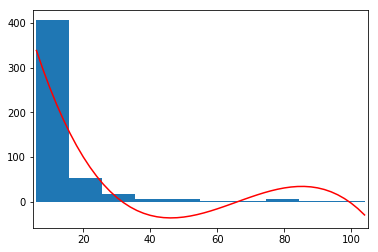

In [183]:
showDegreeDistributionWithFit(graph8)

In [184]:
%%time
gephiGraphNx(graph8)

CPU times: user 8.64 s, sys: 1.26 s, total: 9.9 s
Wall time: 12.4 s


In [185]:
averageDegree(graph8)

13.464

In [186]:
graphDegreeTopN(graph8)

N    Node     Degree  
---- -------- --------
   1        0      104
   2        3       88
   3        1       81
   4        4       81
   5        6       81
   6        5       75
   7        9       75
   8       12       70
   9       10       69
  10        7       60


In [187]:
results.store(tag, simulate(graph8, AddativeWithTargetedDetractive(graph8), Simulation.max_iterations))

time:    1 spread from: 339 -> 245
time:    1 spread from: 339 -> 60
time:    1 spread from: 339 -> 2
time:    1 spread from: 339 -> 5
time:    1 spread from: 339 -> 276
time:    1 spread from: 339 -> 331
time:    1 spread from: 339 -> 187
time:    1 spread from: 339 -> 396
time:    1 spread from: 339 -> 478
time:    2 spread from: 2 -> 1
time:    2 spread from: 2 -> 4
time:    2 spread from: 2 -> 6
time:    2 spread from: 2 -> 8
time:    2 spread from: 2 -> 9
time:    2 spread from: 2 -> 16
time:    2 spread from: 2 -> 17
time:    2 spread from: 2 -> 19
time:    2 spread from: 2 -> 20
time:    2 spread from: 2 -> 21
time:    2 spread from: 2 -> 28
time:    2 spread from: 2 -> 30
time:    2 spread from: 2 -> 31
time:    2 spread from: 2 -> 39
time:    2 spread from: 2 -> 40
time:    2 spread from: 2 -> 43
time:    2 spread from: 2 -> 47
time:    2 spread from: 2 -> 48
time:    2 spread from: 2 -> 53
time:    2 spread from: 2 -> 55
time:    2 spread from: 2 -> 56
time:    2 spread from:

time:    3 spread from: 7 -> 142
time:    3 spread from: 7 -> 157
time:    3 spread from: 7 -> 302
time:    3 spread from: 7 -> 303
time:    3 spread from: 7 -> 316
time:    3 spread from: 7 -> 342
time:    3 spread from: 7 -> 358
time:    3 spread from: 7 -> 366
time:    3 spread from: 7 -> 380
time:    3 spread from: 7 -> 390
time:    3 spread from: 7 -> 401
time:    3 spread from: 7 -> 406
time:    3 spread from: 7 -> 427
time:    3 spread from: 7 -> 492
time:    3 spread from: 8 -> 44
time:    3 spread from: 8 -> 169
time:    3 spread from: 8 -> 175
time:    3 spread from: 8 -> 189
time:    3 spread from: 8 -> 230
time:    3 spread from: 8 -> 254
time:    3 spread from: 8 -> 260
time:    3 spread from: 8 -> 296
time:    3 spread from: 8 -> 320
time:    3 spread from: 8 -> 329
time:    3 spread from: 8 -> 343
time:    3 spread from: 8 -> 420
time:    3 spread from: 8 -> 486
time:    3 spread from: 8 -> 495
time:    3 spread from: 8 -> 503
time:    3 spread from: 8 -> 560
time:    3 

time:    3 spread from: 125 -> 507
time:    3 spread from: 130 -> 261
time:    3 spread from: 148 -> 223
time:    3 spread from: 148 -> 393
time:    3 spread from: 153 -> 337
time:    3 spread from: 155 -> 523
time:    3 spread from: 163 -> 524
time:    3 spread from: 193 -> 476
time:    3 spread from: 193 -> 556
time:    3 spread from: 197 -> 264
time:    3 spread from: 227 -> 384
time:    3 spread from: 227 -> 441
time:    3 spread from: 244 -> 376
time:    3 spread from: 246 -> 551
time:    3 spread from: 293 -> 449
time:    3 spread from: 311 -> 500
time:    3 spread from: 335 -> 359
time:    3 spread from: 361 -> 530
time:    3 spread from: 373 -> 221
time:    4 spread from: 2 -> 580
time:    4 spread from: 7 -> 565
time:    4 spread from: 8 -> 570
time:    4 spread from: 10 -> 582
time:    4 spread from: 11 -> 566
time:    4 spread from: 14 -> 569
time:    4 spread from: 19 -> 583
time:    4 spread from: 20 -> 576
time:    4 spread from: 22 -> 575
time:    4 spread from: 30 -> 56

In [188]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,9,10,20,20,1,1
2,2,172,182,20,40,1,2
3,3,376,558,20,60,1,3
4,4,24,582,20,80,1,4
5,5,21,603,20,100,1,5
6,6,21,624,20,120,1,6
7,7,21,645,20,140,1,7
8,8,21,666,20,160,1,8
9,9,21,687,20,180,1,9


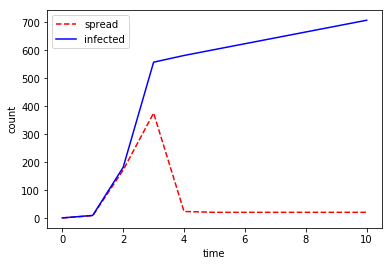

In [189]:
results.showSpreading(tag)

In [190]:
graphDegreeTopN(graph8)

N    Node     Degree  
---- -------- --------
   1       34       57
   2        2       54
   3       13       52
   4       31       52
   5       30       49
   6       22       48
   7       15       47
   8       33       43
   9       24       41
  10       35       41


## Dynamic Graphs - addative and invasive detractive

### Erdos-Renyi (random) graph

In [191]:
url = gephiURL(host, port, 9)
tag = "dynamic-er-additive-with-invasive-detractive"

In [192]:
graph9 = randomGraph()

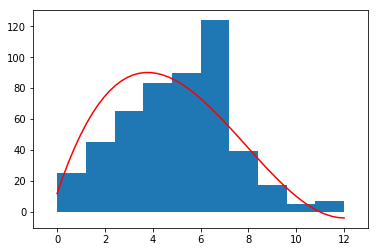

In [193]:
showDegreeDistributionWithFit(graph9)

In [194]:
%%time
gephiGraphNx(graph9)

CPU times: user 3.91 s, sys: 560 ms, total: 4.47 s
Wall time: 5.62 s


In [195]:
averageDegree(graph9)

4.936

In [196]:
graphDegreeTopN(graph9)

N    Node     Degree  
---- -------- --------
   1      296       12
   2      131       11
   3      190       11
   4      259       11
   5      305       11
   6      322       11
   7      362       11
   8      181       10
   9      214       10
  10      265       10


In [197]:
results.store(tag, simulate(graph9, AddativeWithInvasiveDetractive(graph9), Simulation.max_iterations))

time:    1 spread from: 293 -> 104
time:    1 spread from: 293 -> 197
time:    1 spread from: 293 -> 207
time:    1 spread from: 293 -> 281
time:    1 spread from: 293 -> 325
time:    1 spread from: 293 -> 464
time:    2 spread from: 104 -> 39
time:    2 spread from: 104 -> 40
time:    2 spread from: 104 -> 218
time:    2 spread from: 104 -> 292
time:    2 spread from: 104 -> 461
time:    2 spread from: 104 -> 522
time:    2 spread from: 197 -> 310
time:    2 spread from: 197 -> 483
time:    2 spread from: 281 -> 178
time:    2 spread from: 281 -> 402
time:    2 spread from: 281 -> 448
time:    2 spread from: 325 -> 46
time:    2 spread from: 325 -> 112
time:    2 spread from: 325 -> 419
time:    2 spread from: 464 -> 100
time:    2 spread from: 464 -> 198
time:    2 spread from: 464 -> 199
time:    2 spread from: 464 -> 230
time:    2 spread from: 464 -> 355
time:    2 spread from: 464 -> 387
time:    2 spread from: 464 -> 502
time:    3 spread from: 39 -> 170
time:    3 spread from: 

time:    4 spread from: 428 -> 364
time:    4 spread from: 432 -> 331
time:    4 spread from: 432 -> 547
time:    4 spread from: 440 -> 555
time:    4 spread from: 444 -> 103
time:    4 spread from: 444 -> 398
time:    4 spread from: 457 -> 263
time:    4 spread from: 457 -> 454
time:    4 spread from: 460 -> 68
time:    4 spread from: 460 -> 420
time:    4 spread from: 461 -> 575
time:    4 spread from: 470 -> 21
time:    4 spread from: 470 -> 65
time:    4 spread from: 470 -> 354
time:    4 spread from: 470 -> 455
time:    4 spread from: 476 -> 43
time:    4 spread from: 476 -> 500
time:    4 spread from: 484 -> 515
time:    4 spread from: 494 -> 234
time:    4 spread from: 494 -> 468
time:    4 spread from: 508 -> 32
time:    4 spread from: 518 -> 319
time:    4 spread from: 518 -> 33
time:    4 spread from: 519 -> 273
time:    4 spread from: 519 -> 337
time:    4 spread from: 519 -> 160
time:    4 spread from: 520 -> 338
time:    4 spread from: 520 -> 62
time:    4 spread from: 522

time:    5 spread from: 565 -> 436
time:    5 spread from: 566 -> 111
time:    5 spread from: 573 -> 249
time:    5 spread from: 574 -> 363
time:    5 spread from: 575 -> 284
time:    5 spread from: 583 -> 201
time:    6 spread from: 1 -> 108
time:    6 spread from: 4 -> 538
time:    6 spread from: 6 -> 50
time:    6 spread from: 6 -> 617
time:    6 spread from: 6 -> 618
time:    6 spread from: 10 -> 269
time:    6 spread from: 11 -> 614
time:    6 spread from: 17 -> 222
time:    6 spread from: 18 -> 97
time:    6 spread from: 23 -> 168
time:    6 spread from: 23 -> 358
time:    6 spread from: 24 -> 606
time:    6 spread from: 31 -> 620
time:    6 spread from: 37 -> 94
time:    6 spread from: 37 -> 383
time:    6 spread from: 47 -> 622
time:    6 spread from: 51 -> 505
time:    6 spread from: 54 -> 115
time:    6 spread from: 75 -> 295
time:    6 spread from: 80 -> 82
time:    6 spread from: 84 -> 498
time:    6 spread from: 86 -> 163
time:    6 spread from: 86 -> 616
time:    6 spread

In [198]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,6,7,20,20,13,13
2,2,21,28,20,40,13,26
3,3,74,102,20,60,13,39
4,4,192,294,20,80,13,52
5,5,207,501,20,100,13,65
6,6,69,570,20,120,14,79
7,7,23,593,20,140,14,93
8,8,21,614,20,160,14,107
9,9,22,636,20,180,14,121


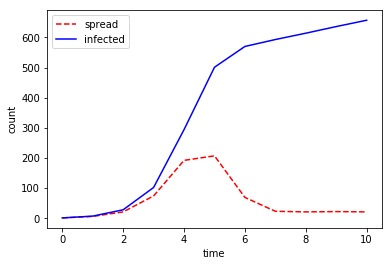

In [199]:
results.showSpreading(tag)

In [200]:
graphDegreeTopN(graph9)

N    Node     Degree  
---- -------- --------
   1      350        7
   2      377        7
   3      444        7
   4      447        7
   5      448        7
   6      449        7
   7      455        7
   8      456        7
   9      470        7
  10      472        7


### Barabasi-Albert graph

In [201]:
url = gephiURL(host, port, 10)
tag = "dynamic-ba-additive-with-invasive-detractive"

In [202]:
graph10 = baGraph()

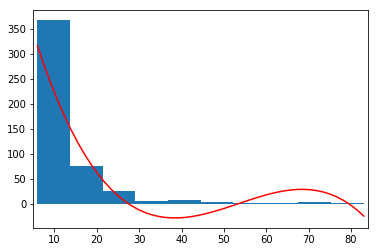

In [203]:
showDegreeDistributionWithFit(graph10)

In [204]:
%%time
gephiGraphNx(graph10)

CPU times: user 8.79 s, sys: 1.28 s, total: 10.1 s
Wall time: 12.6 s


In [205]:
averageDegree(graph10)

13.432

In [206]:
graphDegreeTopN(graph10)

N    Node     Degree  
---- -------- --------
   1        5       83
   2       11       82
   3        1       75
   4        2       74
   5        4       73
   6        3       70
   7        9       65
   8        7       64
   9        6       62
  10        8       59


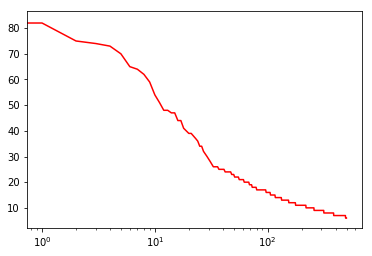

In [207]:
showDegreeDistributionLogScale(graph10)

In [208]:
results.store(tag, simulate(graph10, AddativeWithInvasiveDetractive(graph10), Simulation.max_iterations))

time:    1 spread from: 21 -> 18
time:    1 spread from: 21 -> 16
time:    1 spread from: 21 -> 23
time:    1 spread from: 21 -> 27
time:    1 spread from: 21 -> 36
time:    1 spread from: 21 -> 38
time:    1 spread from: 21 -> 45
time:    1 spread from: 21 -> 50
time:    1 spread from: 21 -> 59
time:    1 spread from: 21 -> 62
time:    1 spread from: 21 -> 63
time:    1 spread from: 21 -> 67
time:    1 spread from: 21 -> 85
time:    1 spread from: 21 -> 88
time:    1 spread from: 21 -> 95
time:    1 spread from: 21 -> 97
time:    1 spread from: 21 -> 110
time:    1 spread from: 21 -> 121
time:    1 spread from: 21 -> 130
time:    1 spread from: 21 -> 141
time:    1 spread from: 21 -> 145
time:    1 spread from: 21 -> 216
time:    1 spread from: 21 -> 225
time:    1 spread from: 21 -> 229
time:    1 spread from: 21 -> 233
time:    1 spread from: 21 -> 239
time:    1 spread from: 21 -> 254
time:    1 spread from: 21 -> 258
time:    1 spread from: 21 -> 261
time:    1 spread from: 21 -> 

time:    2 spread from: 233 -> 348
time:    2 spread from: 239 -> 283
time:    2 spread from: 239 -> 364
time:    2 spread from: 239 -> 508
time:    2 spread from: 239 -> 522
time:    2 spread from: 254 -> 266
time:    2 spread from: 254 -> 301
time:    2 spread from: 254 -> 343
time:    2 spread from: 254 -> 360
time:    2 spread from: 254 -> 361
time:    2 spread from: 254 -> 414
time:    2 spread from: 254 -> 469
time:    2 spread from: 258 -> 193
time:    2 spread from: 261 -> 170
time:    2 spread from: 261 -> 54
time:    2 spread from: 261 -> 292
time:    2 spread from: 261 -> 334
time:    2 spread from: 261 -> 509
time:    2 spread from: 261 -> 515
time:    2 spread from: 262 -> 92
time:    2 spread from: 262 -> 308
time:    2 spread from: 262 -> 409
time:    2 spread from: 262 -> 475
time:    2 spread from: 262 -> 482
time:    2 spread from: 262 -> 494
time:    2 spread from: 271 -> 237
time:    2 spread from: 271 -> 298
time:    2 spread from: 271 -> 347
time:    2 spread from

time:    3 spread from: 161 -> 560
time:    3 spread from: 162 -> 531
time:    3 spread from: 165 -> 427
time:    3 spread from: 170 -> 236
time:    3 spread from: 170 -> 290
time:    3 spread from: 172 -> 550
time:    3 spread from: 173 -> 459
time:    3 spread from: 173 -> 527
time:    3 spread from: 175 -> 57
time:    3 spread from: 175 -> 320
time:    3 spread from: 179 -> 451
time:    3 spread from: 179 -> 466
time:    3 spread from: 180 -> 232
time:    3 spread from: 180 -> 430
time:    3 spread from: 181 -> 547
time:    3 spread from: 183 -> 387
time:    3 spread from: 194 -> 214
time:    3 spread from: 203 -> 370
time:    3 spread from: 211 -> 462
time:    3 spread from: 247 -> 219
time:    3 spread from: 247 -> 562
time:    3 spread from: 264 -> 391
time:    3 spread from: 264 -> 408
time:    3 spread from: 276 -> 383
time:    3 spread from: 277 -> 241
time:    3 spread from: 282 -> 238
time:    3 spread from: 292 -> 413
time:    3 spread from: 303 -> 306
time:    3 spread fro

In [209]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,43,44,20,20,13,13
2,2,274,318,20,40,13,26
3,3,218,536,20,60,13,39
4,4,25,561,20,80,13,52
5,5,21,582,20,100,13,65
6,6,21,603,20,120,14,79
7,7,21,624,20,140,14,93
8,8,21,645,20,160,14,107
9,9,21,666,20,180,14,121


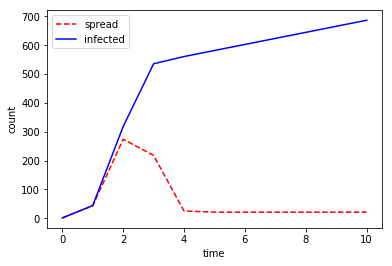

In [210]:
results.showSpreading(tag)

In [211]:
graphDegreeTopN(graph10)

N    Node     Degree  
---- -------- --------
   1       73       15
   2       74       15
   3      139       15
   4      146       15
   5      220       15
   6      252       15
   7      254       15
   8      500       15
   9      512       15
  10      515       15


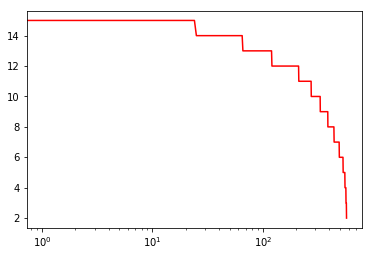

In [212]:
showDegreeDistributionLogScale(graph10)

## Dynamic Graphs - addative and extremely invasive detractive

### Erdos-Renyi (random) graph

In [213]:
url = gephiURL(host, port, 11)
tag = "dynamic-er-additive-with-extremely-invasive-detractive"

In [214]:
graph11 = randomGraph()

In [215]:
print(nx.info(graph11))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 1303
Average degree:   5.2120


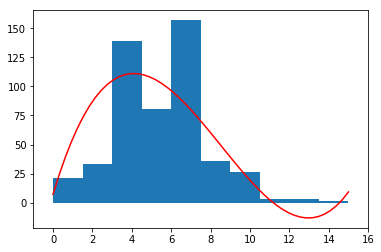

In [216]:
showDegreeDistributionWithFit(graph11)

In [217]:
%%time
gephiGraphNx(graph11)

CPU times: user 4.06 s, sys: 587 ms, total: 4.64 s
Wall time: 5.87 s


In [218]:
graphDegreeTopN(graph11)

N    Node     Degree  
---- -------- --------
   1       83       15
   2       84       13
   3      355       13
   4      127       12
   5      157       11
   6      255       11
   7      491       11
   8        5       10
   9       37       10
  10       86       10


In [219]:
results.store(tag, simulate(graph11, AddativeWithExtremeInvasiveDetractive(graph11), Simulation.max_iterations))

time:    1 spread from: 310 -> 111
time:    1 spread from: 310 -> 120
time:    1 spread from: 310 -> 276
time:    2 spread from: 111 -> 252
time:    2 spread from: 111 -> 363
time:    2 spread from: 111 -> 399
time:    2 spread from: 111 -> 576
time:    2 spread from: 120 -> 266
time:    2 spread from: 120 -> 454
time:    2 spread from: 120 -> 582
time:    2 spread from: 276 -> 285
time:    2 spread from: 276 -> 391
time:    2 spread from: 276 -> 480
time:    2 spread from: 276 -> 511
time:    2 spread from: 276 -> 552
time:    3 spread from: 120 -> 621
time:    3 spread from: 252 -> 551
time:    3 spread from: 285 -> 98
time:    3 spread from: 285 -> 219
time:    3 spread from: 285 -> 286
time:    3 spread from: 285 -> 512
time:    3 spread from: 363 -> 406
time:    3 spread from: 363 -> 445
time:    3 spread from: 363 -> 487
time:    3 spread from: 363 -> 631
time:    3 spread from: 399 -> 136
time:    3 spread from: 399 -> 541
time:    3 spread from: 399 -> 635
time:    3 spread fro

time:    6 spread from: 268 -> 704
time:    6 spread from: 287 -> 671
time:    6 spread from: 287 -> 721
time:    6 spread from: 290 -> 719
time:    6 spread from: 353 -> 461
time:    6 spread from: 353 -> 650
time:    6 spread from: 353 -> 672
time:    6 spread from: 357 -> 251
time:    6 spread from: 357 -> 365
time:    6 spread from: 369 -> 45
time:    6 spread from: 369 -> 564
time:    6 spread from: 371 -> 558
time:    6 spread from: 371 -> 605
time:    6 spread from: 372 -> 124
time:    6 spread from: 372 -> 420
time:    6 spread from: 395 -> 775
time:    6 spread from: 398 -> 435
time:    6 spread from: 398 -> 760
time:    6 spread from: 400 -> 264
time:    6 spread from: 407 -> 779
time:    6 spread from: 429 -> 94
time:    6 spread from: 431 -> 531
time:    6 spread from: 432 -> 594
time:    6 spread from: 437 -> 485
time:    6 spread from: 437 -> 520
time:    6 spread from: 437 -> 587
time:    6 spread from: 446 -> 172
time:    6 spread from: 446 -> 659
time:    6 spread from

time:    8 spread from: 2 -> 877
time:    8 spread from: 14 -> 895
time:    8 spread from: 14 -> 906
time:    8 spread from: 25 -> 384
time:    8 spread from: 25 -> 404
time:    8 spread from: 44 -> 633
time:    8 spread from: 44 -> 886
time:    8 spread from: 45 -> 865
time:    8 spread from: 67 -> 652
time:    8 spread from: 80 -> 896
time:    8 spread from: 85 -> 871
time:    8 spread from: 98 -> 870
time:    8 spread from: 101 -> 892
time:    8 spread from: 101 -> 900
time:    8 spread from: 122 -> 880
time:    8 spread from: 124 -> 858
time:    8 spread from: 132 -> 90
time:    8 spread from: 133 -> 222
time:    8 spread from: 133 -> 770
time:    8 spread from: 135 -> 509
time:    8 spread from: 151 -> 889
time:    8 spread from: 180 -> 904
time:    8 spread from: 186 -> 905
time:    8 spread from: 187 -> 878
time:    8 spread from: 190 -> 807
time:    8 spread from: 195 -> 744
time:    8 spread from: 202 -> 656
time:    8 spread from: 202 -> 891
time:    8 spread from: 221 -> 901

In [220]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,3,4,50,50,55,55
2,2,12,16,50,100,54,109
3,3,30,46,50,150,54,163
4,4,65,111,50,200,54,217
5,5,103,214,50,250,53,270
6,6,137,351,50,300,53,323
7,7,135,486,50,350,53,376
8,8,98,584,50,400,53,429
9,9,63,647,50,450,53,482


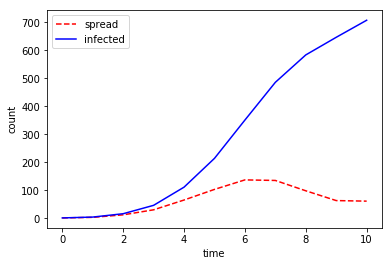

In [221]:
results.showSpreading(tag)

In [222]:
print(nx.info(graph11))

Name: 
Type: Graph
Number of nodes: 476
Number of edges: 595
Average degree:   2.5000


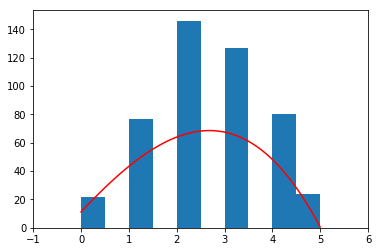

In [223]:
showDegreeDistributionWithFit(graph11)

In [224]:
graphDegreeTopN(graph11)

N    Node     Degree  
---- -------- --------
   1      775        5
   2      785        5
   3      816        5
   4      851        5
   5      854        5
   6      867        5
   7      869        5
   8      876        5
   9      880        5
  10      881        5


### Barabasi-Albert graph

In [225]:
url = gephiURL(host, port, 12)
tag = "dynamic-ba-additive-with-extremely-invasive-detractive"

In [226]:
graph12 = baGraph()

In [227]:
print(nx.info(graph12))

Name: 
Type: Graph
Number of nodes: 500
Number of edges: 3376
Average degree:  13.5040


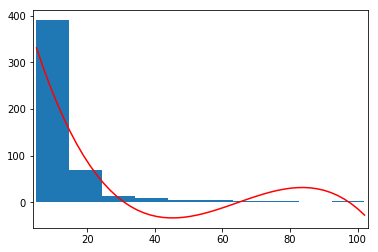

In [228]:
showDegreeDistributionWithFit(graph12)

In [229]:
%%time
gephiGraphNx(graph12)

CPU times: user 8.59 s, sys: 1.27 s, total: 9.86 s
Wall time: 12.5 s


In [230]:
graphDegreeTopN(graph12)

N    Node     Degree  
---- -------- --------
   1        4      102
   2        2       98
   3        1       95
   4        0       82
   5        5       78
   6        6       68
   7       11       68
   8       17       67
   9        8       62
  10        7       60


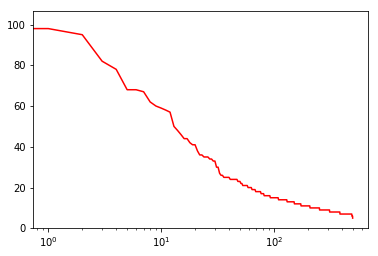

In [231]:
showDegreeDistributionLogScale(graph12)

In [232]:
results.store(tag, simulate(graph12, AddativeWithExtremeInvasiveDetractive(graph12), Simulation.max_iterations))

time:    1 spread from: 156 -> 157
time:    1 spread from: 156 -> 194
time:    1 spread from: 156 -> 230
time:    1 spread from: 156 -> 272
time:    1 spread from: 156 -> 274
time:    1 spread from: 156 -> 316
time:    1 spread from: 156 -> 328
time:    1 spread from: 156 -> 395
time:    1 spread from: 156 -> 466
time:    1 spread from: 156 -> 487
time:    1 spread from: 156 -> 507
time:    1 spread from: 156 -> 512
time:    1 spread from: 156 -> 532
time:    1 spread from: 156 -> 534
time:    2 spread from: 157 -> 281
time:    2 spread from: 157 -> 336
time:    2 spread from: 157 -> 352
time:    2 spread from: 157 -> 374
time:    2 spread from: 157 -> 377
time:    2 spread from: 157 -> 446
time:    2 spread from: 157 -> 480
time:    2 spread from: 157 -> 506
time:    2 spread from: 157 -> 528
time:    2 spread from: 157 -> 600
time:    2 spread from: 194 -> 114
time:    2 spread from: 194 -> 154
time:    2 spread from: 194 -> 93
time:    2 spread from: 194 -> 168
time:    2 spread fro

time:    3 spread from: 196 -> 235
time:    3 spread from: 196 -> 236
time:    3 spread from: 196 -> 307
time:    3 spread from: 196 -> 364
time:    3 spread from: 196 -> 557
time:    3 spread from: 218 -> 71
time:    3 spread from: 218 -> 238
time:    3 spread from: 218 -> 258
time:    3 spread from: 218 -> 369
time:    3 spread from: 218 -> 636
time:    3 spread from: 241 -> 489
time:    3 spread from: 247 -> 136
time:    3 spread from: 247 -> 311
time:    3 spread from: 247 -> 339
time:    3 spread from: 247 -> 359
time:    3 spread from: 247 -> 475
time:    3 spread from: 247 -> 631
time:    3 spread from: 252 -> 128
time:    3 spread from: 252 -> 295
time:    3 spread from: 252 -> 412
time:    3 spread from: 252 -> 444
time:    3 spread from: 269 -> 149
time:    3 spread from: 269 -> 120
time:    3 spread from: 270 -> 98
time:    3 spread from: 270 -> 189
time:    3 spread from: 270 -> 396
time:    3 spread from: 275 -> 260
time:    3 spread from: 275 -> 72
time:    3 spread from:

time:    4 spread from: 239 -> 197
time:    4 spread from: 245 -> 368
time:    4 spread from: 255 -> 490
time:    4 spread from: 256 -> 122
time:    4 spread from: 257 -> 165
time:    4 spread from: 257 -> 540
time:    4 spread from: 259 -> 202
time:    4 spread from: 259 -> 353
time:    4 spread from: 260 -> 686
time:    4 spread from: 263 -> 323
time:    4 spread from: 289 -> 417
time:    4 spread from: 290 -> 468
time:    4 spread from: 301 -> 408
time:    4 spread from: 312 -> 473
time:    4 spread from: 315 -> 383
time:    4 spread from: 318 -> 195
time:    4 spread from: 320 -> 436
time:    4 spread from: 329 -> 213
time:    4 spread from: 333 -> 159
time:    4 spread from: 342 -> 287
time:    4 spread from: 359 -> 264
time:    4 spread from: 362 -> 464
time:    4 spread from: 369 -> 380
time:    4 spread from: 389 -> 399
time:    4 spread from: 390 -> 228
time:    4 spread from: 429 -> 433
time:    4 spread from: 447 -> 387
time:    4 spread from: 479 -> 233
time:    4 spread fr

time:   10 spread from: 22 -> 962
time:   10 spread from: 41 -> 973
time:   10 spread from: 41 -> 987
time:   10 spread from: 59 -> 1004
time:   10 spread from: 66 -> 960
time:   10 spread from: 67 -> 998
time:   10 spread from: 67 -> 999
time:   10 spread from: 71 -> 969
time:   10 spread from: 71 -> 970
time:   10 spread from: 72 -> 1001
time:   10 spread from: 73 -> 986
time:   10 spread from: 73 -> 1009
time:   10 spread from: 77 -> 965
time:   10 spread from: 78 -> 971
time:   10 spread from: 87 -> 985
time:   10 spread from: 87 -> 1005
time:   10 spread from: 91 -> 975
time:   10 spread from: 92 -> 961
time:   10 spread from: 98 -> 991
time:   10 spread from: 101 -> 1003
time:   10 spread from: 103 -> 996
time:   10 spread from: 107 -> 983
time:   10 spread from: 107 -> 990
time:   10 spread from: 108 -> 968
time:   10 spread from: 117 -> 964
time:   10 spread from: 117 -> 977
time:   10 spread from: 122 -> 993
time:   10 spread from: 122 -> 995
time:   10 spread from: 129 -> 980

In [233]:
results.showResultsTable(tag)

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,0,0,0,0
1,1,14,15,50,50,55,55
2,2,85,100,50,100,54,109
3,3,281,381,50,150,54,163
4,4,159,540,50,200,54,217
5,5,49,589,50,250,53,270
6,6,40,629,50,300,53,323
7,7,31,660,50,350,53,376
8,8,42,702,50,400,53,429
9,9,43,745,50,450,53,482


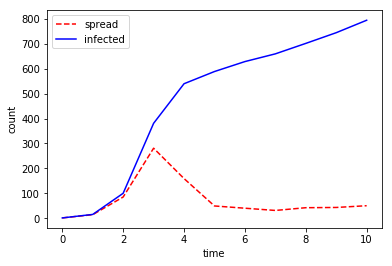

In [234]:
results.showSpreading(tag)

In [235]:
print(nx.info(graph12))

Name: 
Type: Graph
Number of nodes: 476
Number of edges: 1831
Average degree:   7.6933


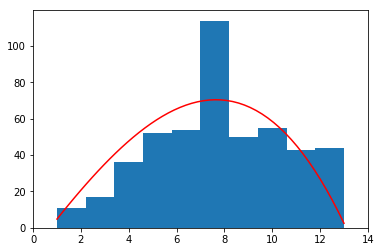

In [236]:
showDegreeDistributionWithFit(graph12)

In [237]:
graphDegreeTopN(graph12)

N    Node     Degree  
---- -------- --------
   1      710       13
   2      713       13
   3      893       13
   4      931       13
   5      960       13
   6      973       13
   7      982       13
   8      985       13
   9      986       13
  10      987       13


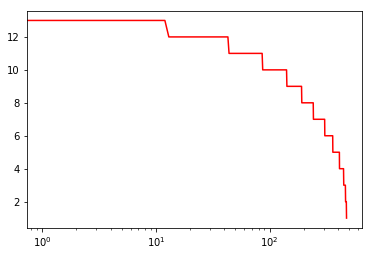

In [238]:
showDegreeDistributionLogScale(graph12)

# Results Analysis

In [311]:
scenarios = {
    1:  "static-er-spreading-only",
    2:  "static-ba-spreading-only",
    3:  "dynamic-er-additive-only",
    4:  "dynamic-ba-additive-only",
    5:  "dynamic-er-additive-with-random-detractive",
    6:  "dynamic-ba-additive-with-random-detractive",
    7:  "dynamic-er-additive-with-targeted-detractive",
    8:  "dynamic-ba-additive-with-targeted-detractive",
    9:  "dynamic-er-additive-with-invasive-detractive",
    10: "dynamic-ba-additive-with-invasive-detractive",
    11: "dynamic-er-additive-with-extremely-invasive-detractive",
    12: "dynamic-ba-additive-with-extremely-invasive-detractive"
}

In [333]:
labels = {
    0: "spreading",
    1: "additive",
    2: "random",
    3: "targeted",
    4: "invasive",
    5: "extreme",
}

In [312]:
randomGraphs = [1, 3, 5, 7, 9, 11]
scalefreeGraphs = [2, 4, 6, 8, 10, 12]

## Fix The Data

adjust the size of the shorter results DataFrames so we can plot them all together

we append the final row 'n' times to grow the DataFrames to the desired size

### scenario 1: "static-er-spreading-only"

In [304]:
# before
results.data["static-er-spreading-only"]

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,5,6,NaN,NaN,NaN,NaN
2,2,22,28,NaN,NaN,NaN,NaN
3,3,89,117,NaN,NaN,NaN,NaN
4,4,234,351,NaN,NaN,NaN,NaN
5,5,136,487,NaN,NaN,NaN,NaN
6,6,8,495,NaN,NaN,NaN,NaN
7,7,1,496,NaN,NaN,NaN,NaN
8,8,0,496,NaN,NaN,NaN,NaN


In [305]:
# append
for j in range(9, 11):
    dfa = pd.DataFrame(columns=results.data["static-er-spreading-only"].columns)
    dfa.time = [j]
    dfa.spread_count = results.data["static-er-spreading-only"][-1:].spread_count.values[0]
    dfa.spread_total = results.data["static-er-spreading-only"][-1:].spread_total.values[0]
    results.data["static-er-spreading-only"].loc[j] = dfa.loc[0]

In [306]:
# after
results.data["static-er-spreading-only"]

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,5,6,NaN,NaN,NaN,NaN
2,2,22,28,NaN,NaN,NaN,NaN
3,3,89,117,NaN,NaN,NaN,NaN
4,4,234,351,NaN,NaN,NaN,NaN
5,5,136,487,NaN,NaN,NaN,NaN
6,6,8,495,NaN,NaN,NaN,NaN
7,7,1,496,NaN,NaN,NaN,NaN
8,8,0,496,NaN,NaN,NaN,NaN
9,9,0,496,NaN,NaN,NaN,NaN


### scenario 2: "static-ba-spreading-only"

In [308]:
# before
results.data["static-ba-spreading-only"]

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,7,8,NaN,NaN,NaN,NaN
2,2,155,163,NaN,NaN,NaN,NaN
3,3,334,497,NaN,NaN,NaN,NaN
4,4,3,500,NaN,NaN,NaN,NaN
5,5,0,500,NaN,NaN,NaN,NaN


In [309]:
# append
for j in range(6, 11):
    dfa = pd.DataFrame(columns=results.data["static-ba-spreading-only"].columns)
    dfa.time = [j]
    dfa.spread_count = results.data["static-ba-spreading-only"][-1:].spread_count.values[0]
    dfa.spread_total = results.data["static-ba-spreading-only"][-1:].spread_total.values[0]
    results.data["static-ba-spreading-only"].loc[j] = dfa.loc[0]

In [310]:
# after
results.data["static-er-spreading-only"]

,time,spread_count,spread_total,growth_count,growth_total,destruction_count,destruction_total
0,0,1,1,NaN,NaN,NaN,NaN
1,1,5,6,NaN,NaN,NaN,NaN
2,2,22,28,NaN,NaN,NaN,NaN
3,3,89,117,NaN,NaN,NaN,NaN
4,4,234,351,NaN,NaN,NaN,NaN
5,5,136,487,NaN,NaN,NaN,NaN
6,6,8,495,NaN,NaN,NaN,NaN
7,7,1,496,NaN,NaN,NaN,NaN
8,8,0,496,NaN,NaN,NaN,NaN
9,9,0,496,NaN,NaN,NaN,NaN


## Plot Metrics

now plot values for each scenario, grouped by graph type, and metric

In [358]:
def plotSeries(title, x, data):
    for i in range(len(data)):
        plt.plot(x, data[i], label=labels[i])    
    plt.xlabel('time')
    plt.ylabel('count')
    plt.title(title)
    plt.legend()
    plt.show()

In [359]:
def plotScenarios(title, scenarioIndexes, column):
    time = []
    data = []
    for i in scenarioIndexes:
        # get the scenario 'tag'
        scenario = scenarios[i]
        # get the vector of time just once
        if len(time) == 0:
            time = results.data[scenario].time.values
        # append the data for this scenario into the data array
        data.append(results.data[scenario][column].values)
    plotSeries(title, time, data)

### Spreading Rate

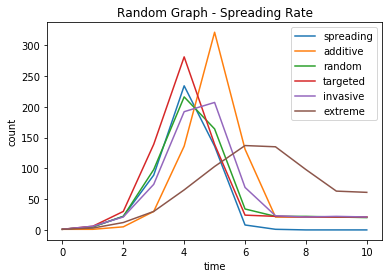

In [360]:
plotScenarios("Random Graph - Spreading Rate", randomGraphs, 'spread_count')

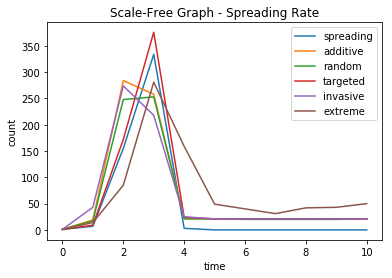

In [361]:
plotScenarios("Scale-Free Graph - Spreading Rate", scalefreeGraphs, 'spread_count')

### Total Spread (Saturation)

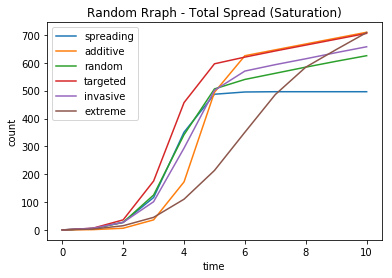

In [362]:
plotScenarios("Random Rraph - Total Spread (Saturation)", randomGraphs, 'spread_total')

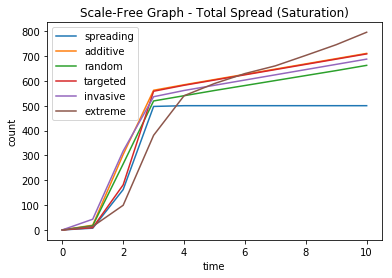

In [363]:
plotScenarios("Scale-Free Graph - Total Spread (Saturation)", scalefreeGraphs, 'spread_total')